In [1]:
import pandas as pd
import numpy as np
import glob
import gc
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.coordinates import SkyCoord, AltAz, angular_separation
import astropy.units as u
from scipy.stats import binned_statistic
from scipy.signal import lombscargle
import h5py
from astropy.io import fits
from astropy.table import Table

In [2]:
def get_year_month_day_dirname_fromPath(name):
    RUN_year = 0
    RUN_month = 0 
    RUN_day = 0
    RUN_dirname = "00000000"
    #
    RUN_dirname = name.split('/')[-3]
    RUN_year = int(RUN_dirname[:4])
    RUN_month = int(RUN_dirname[4:6])
    RUN_day = int(RUN_dirname[-2:])
    #
    #print("RUN_year    ",RUN_year)
    #print("RUN_month   ",RUN_month)
    #print("RUN_day     ",RUN_day)
    #print("RUN_dirname ",RUN_dirname)
    #
    return RUN_year, RUN_month, RUN_day, RUN_dirname 

In [3]:
def get_csvdir_fromPath(name,prefix="./"):
    #print(name.split('/'))
    return str(prefix + '/' +name.split('/')[-2]+'_csv')

In [4]:
def get_subrun_ID_fromPath(name):
    #print(int(name.split('.')[-2]))
    return int(name.split('.')[-2])

In [5]:
def get_list_of_subruns(df_tot, runID):
    df_tmp=df_tot[df_tot['runID_int']==runID]
    df_tmp=df_tmp.sort_values(by='subRunID_int')
    return df_tmp['subRunlist'].values

In [6]:
def test_single_sub_fits_file( file_name_in, list_ref_file):
    df_tmp=Table.read(file_name_in, format='fits').to_pandas()
    list_curr_file = df_tmp.keys()
    if (len(list_curr_file) == len(list_ref_file)):
        return all(list_curr_file == list_ref_file)
    else:
        return False

In [7]:
df_list=pd.read_csv("subRunlist.csv")

In [8]:
df_list_v09=df_list[df_list['ver']=="v0.9"]
df_list_v10=df_list[df_list['ver']=="v0.10"]

In [9]:
df_list_v09_sorted = df_list_v09.sort_values(by='runID_int')
df_list_v10_sorted = df_list_v10.sort_values(by='runID_int')

In [10]:
v09_runID=np.unique(df_list_v09_sorted['runID_int'].values)
v10_runID=np.unique(df_list_v10_sorted['runID_int'].values)

In [11]:
print(len(v10_runID))
print(len(v09_runID))
print(len(v09_runID) + len(v10_runID))

7118
5975
13093


In [12]:
v_runID=np.unique(np.concatenate((v09_runID,v10_runID)))

In [13]:
print(len(v_runID))

10630


In [14]:
list_ref_file = Table.read(get_list_of_subruns(df_list_v09, v09_runID[0])[0], format='fits').to_pandas().keys()

In [15]:
list_ref_file

Index(['event_id', 'event_time', 'mc_energy', 'ring_size', 'size_outside',
       'ring_center_x', 'ring_center_y', 'ring_radius', 'ring_width',
       'good_ring', 'muon_efficiency', 'ring_containment', 'ring_completeness',
       'impact_parameter', 'impact_x_array', 'impact_y_array', 'radial_stdev',
       'radial_skewness', 'radial_excess_kurtosis', 'num_pixels_in_ring',
       'mean_pixel_charge_around_ring', 'hg_peak_sample', 'lg_peak_sample'],
      dtype='object')

In [16]:
#all([test_single_sub_fits_file(get_list_of_subruns(df_list_v09, v09_runID[i])[0], list_ref_file) for i in np.arange(len(v09_runID))])

In [17]:
#all([test_single_sub_fits_file(get_list_of_subruns(df_list_v10, v10_runID[i])[0], list_ref_file) for i in np.arange(len(v10_runID))])

In [ ]:
for i in np.arange(len(v09_runID)):
    #for i in np.arange(1):
    print("RUN_ID : ", v09_runID[i])
    list_of_subruns = get_list_of_subruns(df_list_v09, v09_runID[i])
    RUN_year, RUN_month, RUN_day, RUN_dirname = get_year_month_day_dirname_fromPath(list_of_subruns[0])
    print("SUBRUN : ", list_of_subruns[0])
    df_tmp_list=[]
    for j in np.arange(len(list_of_subruns)):
        subrunid=get_subrun_ID_fromPath(list_of_subruns[j])
        df_tmp=Table.read(get_list_of_subruns(df_list_v09, v09_runID[i])[j], format='fits').to_pandas()
        df_tmp['RUN_ID'] = v09_runID[i]
        df_tmp['SUBRUN_ID'] = subrunid
        #
        df_tmp['RUN_year'] = RUN_year
        df_tmp['RUN_month'] = RUN_month
        df_tmp['RUN_day'] = RUN_day
        #
        df_tmp_list.append(df_tmp)
        #
    df_test_runid_subrunid = pd.concat(df_tmp_list)
    df_test_runid_subrunid.dropna(inplace=True)
    #
    csv_dir=get_csvdir_fromPath(list_of_subruns[0],str("../muons_DL1_tar_gz/" + RUN_dirname))
    !mkdir -p $csv_dir
    #!rm -rf $csv_dir
    if(len(df_test_runid_subrunid)>0):
        df_test_runid_subrunid.to_csv(str(csv_dir + '/' +  str(v09_runID[i]) + '.csv'),sep=" ")
    print(csv_dir)

RUN_ID :  1615
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20191123/v0.9/muons_LST-1.Run01615.0000.fits
../muons_DL1_tar_gz/20191123/v0.9_csv
RUN_ID :  1616
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20191123/v0.9/muons_LST-1.Run01616.0000.fits
../muons_DL1_tar_gz/20191123/v0.9_csv
RUN_ID :  1617
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20191123/v0.9/muons_LST-1.Run01617.0000.fits
../muons_DL1_tar_gz/20191123/v0.9_csv
RUN_ID :  1618
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20191123/v0.9/muons_LST-1.Run01618.0000.fits
../muons_DL1_tar_gz/20191123/v0.9_csv
RUN_ID :  1619
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20191123/v0.9/muons_LST-1.Run01619.0000.fits
../muons_DL1_tar_gz/20191123/v0.9_csv
RUN_ID :  1620
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20191123/v0.9/muons_LST-1.Run01620.0000.fits
../muons_DL1_tar_gz/20191123/v0.9_csv
RUN_ID :  1621
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20191

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200115/v0.9_csv
RUN_ID :  1801
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200115/v0.9/muons_LST-1.Run01801.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200115/v0.9_csv
RUN_ID :  1807
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200117/v0.9/muons_LST-1.Run01807.0000.fits
../muons_DL1_tar_gz/20200117/v0.9_csv
RUN_ID :  1808
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200117/v0.9/muons_LST-1.Run01808.0000.fits
../muons_DL1_tar_gz/20200117/v0.9_csv
RUN_ID :  1809
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200117/v0.9/muons_LST-1.Run01809.0000.fits
../muons_DL1_tar_gz/20200117/v0.9_csv
RUN_ID :  1810
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200117/v0.9/muons_LST-1.Run01810.0000.fits
../muons_DL1_tar_gz/20200117/v0.9_csv
RUN_ID :  1812
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200117/v0.9/muons_LST-1.Run01812.0000.fits
../muons_DL1_tar_gz/20200117/v0.9_csv
RUN_ID :  1813
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200117/v0.9/muons_LST-1.Run01813.0000.fits
../muons_DL1_tar_gz/20200117/v0.9_csv
RUN_ID :  1814
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200118/v0.9_csv
RUN_ID :  1841
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200118/v0.9/muons_LST-1.Run01841.0000.fits
../muons_DL1_tar_gz/20200118/v0.9_csv
RUN_ID :  1842
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200118/v0.9/muons_LST-1.Run01842.0000.fits
../muons_DL1_tar_gz/20200118/v0.9_csv
RUN_ID :  1843
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200118/v0.9/muons_LST-1.Run01843.0000.fits
../muons_DL1_tar_gz/20200118/v0.9_csv
RUN_ID :  1844
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200118/v0.9/muons_LST-1.Run01844.0000.fits
../muons_DL1_tar_gz/20200118/v0.9_csv
RUN_ID :  1874
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200127/v0.9/muons_LST-1.Run01874.0000.fits
../muons_DL1_tar_gz/20200127/v0.9_csv
RUN_ID :  1875
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200127/v0.9/muons_LST-1.Run01875.0000.fits
../muons_DL1_tar_gz/20200127/v0.9_csv
RUN_ID :  1876
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200131/v0.9_csv
RUN_ID :  1924
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200201/v0.9/muons_LST-1.Run01924.0000.fits
../muons_DL1_tar_gz/20200201/v0.9_csv
RUN_ID :  1925
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200201/v0.9/muons_LST-1.Run01925.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200201/v0.9_csv
RUN_ID :  1926
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200201/v0.9/muons_LST-1.Run01926.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200201/v0.9_csv
RUN_ID :  1927
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200201/v0.9/muons_LST-1.Run01927.0000.fits
../muons_DL1_tar_gz/20200201/v0.9_csv
RUN_ID :  1928
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200201/v0.9/muons_LST-1.Run01928.0000.fits
../muons_DL1_tar_gz/20200201/v0.9_csv
RUN_ID :  1929
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200201/v0.9/muons_LST-1.Run01929.0000.fits
../muons_DL1_tar_gz/20200201/v0.9_csv
RUN_ID :  1930
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200201/v0.9/muons_LST-1.Run01930.0000.fits
../muons_DL1_tar_gz/20200201/v0.9_csv
RUN_ID :  1931
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200201/v0.9/muons_LST-1.Run01931.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200201/v0.9_csv
RUN_ID :  1932
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200201/v0.9/muons_LST-1.Run01932.0000.fits
../muons_DL1_tar_gz/20200201/v0.9_csv
RUN_ID :  1933
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200201/v0.9/muons_LST-1.Run01933.0000.fits
../muons_DL1_tar_gz/20200201/v0.9_csv
RUN_ID :  1948
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200202/v0.9/muons_LST-1.Run01948.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200202/v0.9_csv
RUN_ID :  1949
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200202/v0.9/muons_LST-1.Run01949.0000.fits
../muons_DL1_tar_gz/20200202/v0.9_csv
RUN_ID :  1951
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200202/v0.9/muons_LST-1.Run01951.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200202/v0.9_csv
RUN_ID :  1952
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200202/v0.9/muons_LST-1.Run01952.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200202/v0.9_csv
RUN_ID :  1953
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200202/v0.9/muons_LST-1.Run01953.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200202/v0.9_csv
RUN_ID :  1954
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200202/v0.9/muons_LST-1.Run01954.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)
/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200202/v0.9_csv
RUN_ID :  1955
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200202/v0.9/muons_LST-1.Run01955.0000.fits
../muons_DL1_tar_gz/20200202/v0.9_csv
RUN_ID :  1969
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200213/v0.9/muons_LST-1.Run01969.0000.fits
../muons_DL1_tar_gz/20200213/v0.9_csv
RUN_ID :  1970
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200213/v0.9/muons_LST-1.Run01970.0000.fits
../muons_DL1_tar_gz/20200213/v0.9_csv
RUN_ID :  1971
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200213/v0.9/muons_LST-1.Run01971.0000.fits
../muons_DL1_tar_gz/20200213/v0.9_csv
RUN_ID :  1987
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200215/v0.9/muons_LST-1.Run01987.0000.fits
../muons_DL1_tar_gz/20200215/v0.9_csv
RUN_ID :  1988
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200215/v0.9/muons_LST-1.Run01988.0000.fits
../muons_DL1_tar_gz/20200215/v0.9_csv
RUN_ID :  1990
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200227/v0.9_csv
RUN_ID :  2032
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200227/v0.9/muons_LST-1.Run02032.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200227/v0.9_csv
RUN_ID :  2033
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200227/v0.9/muons_LST-1.Run02033.0000.fits
../muons_DL1_tar_gz/20200227/v0.9_csv
RUN_ID :  2036
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200228/v0.9/muons_LST-1.Run02036.0000.fits
../muons_DL1_tar_gz/20200228/v0.9_csv
RUN_ID :  2037
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200228/v0.9/muons_LST-1.Run02037.0000.fits
../muons_DL1_tar_gz/20200228/v0.9_csv
RUN_ID :  2075
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200610/v0.9/muons_LST-1.Run02075.0000.fits
../muons_DL1_tar_gz/20200610/v0.9_csv
RUN_ID :  2076
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200610/v0.9/muons_LST-1.Run02076.0000.fits
../muons_DL1_tar_gz/20200610/v0.9_csv
RUN_ID :  2077
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200610/v0.9/muons_LST-1.Run02077.0000.fits
../muons_DL1_tar_gz/20200610/v0.9_csv
RUN_ID :  2113
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200618/v0.9_csv
RUN_ID :  2114
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200618/v0.9/muons_LST-1.Run02114.0000.fits
../muons_DL1_tar_gz/20200618/v0.9_csv
RUN_ID :  2115
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200618/v0.9/muons_LST-1.Run02115.0000.fits
../muons_DL1_tar_gz/20200618/v0.9_csv
RUN_ID :  2116
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200618/v0.9/muons_LST-1.Run02116.0000.fits
../muons_DL1_tar_gz/20200618/v0.9_csv
RUN_ID :  2117
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200618/v0.9/muons_LST-1.Run02117.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200618/v0.9_csv
RUN_ID :  2130
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200622/v0.9/muons_LST-1.Run02130.0000.fits
../muons_DL1_tar_gz/20200622/v0.9_csv
RUN_ID :  2131
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200622/v0.9/muons_LST-1.Run02131.0000.fits
../muons_DL1_tar_gz/20200622/v0.9_csv
RUN_ID :  2132
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200622/v0.9/muons_LST-1.Run02132.0000.fits
../muons_DL1_tar_gz/20200622/v0.9_csv
RUN_ID :  2133
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200622/v0.9/muons_LST-1.Run02133.0000.fits
../muons_DL1_tar_gz/20200622/v0.9_csv
RUN_ID :  2134
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200622/v0.9/muons_LST-1.Run02134.0000.fits
../muons_DL1_tar_gz/20200622/v0.9_csv
RUN_ID :  2137
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200624/v0.9/muons_LST-1.Run02137.0000.fits
../muons_DL1_tar_gz/20200624/v0.9_csv
RUN_ID :  2138
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200719/v0.9_csv
RUN_ID :  2279
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200719/v0.9/muons_LST-1.Run02279.0000.fits
../muons_DL1_tar_gz/20200719/v0.9_csv
RUN_ID :  2280
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200719/v0.9/muons_LST-1.Run02280.0000.fits
../muons_DL1_tar_gz/20200719/v0.9_csv
RUN_ID :  2281
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200719/v0.9/muons_LST-1.Run02281.0000.fits
../muons_DL1_tar_gz/20200719/v0.9_csv
RUN_ID :  2288
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200720/v0.9/muons_LST-1.Run02288.0000.fits
../muons_DL1_tar_gz/20200720/v0.9_csv
RUN_ID :  2289
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200720/v0.9/muons_LST-1.Run02289.0000.fits
../muons_DL1_tar_gz/20200720/v0.9_csv
RUN_ID :  2290
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200720/v0.9/muons_LST-1.Run02290.0000.fits
../muons_DL1_tar_gz/20200720/v0.9_csv
RUN_ID :  2291
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200727/v0.9_csv
RUN_ID :  2356
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200727/v0.9/muons_LST-1.Run02356.0000.fits
../muons_DL1_tar_gz/20200727/v0.9_csv
RUN_ID :  2358
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200727/v0.9/muons_LST-1.Run02358.0000.fits
../muons_DL1_tar_gz/20200727/v0.9_csv
RUN_ID :  2359
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200727/v0.9/muons_LST-1.Run02359.0000.fits
../muons_DL1_tar_gz/20200727/v0.9_csv
RUN_ID :  2360
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200727/v0.9/muons_LST-1.Run02360.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200727/v0.9_csv
RUN_ID :  2361
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200727/v0.9/muons_LST-1.Run02361.0000.fits
../muons_DL1_tar_gz/20200727/v0.9_csv
RUN_ID :  2362
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200727/v0.9/muons_LST-1.Run02362.0000.fits
../muons_DL1_tar_gz/20200727/v0.9_csv
RUN_ID :  2370
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200809/v0.9/muons_LST-1.Run02370.0000.fits
../muons_DL1_tar_gz/20200809/v0.9_csv
RUN_ID :  2371
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200809/v0.9/muons_LST-1.Run02371.0000.fits
../muons_DL1_tar_gz/20200809/v0.9_csv
RUN_ID :  2372
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200809/v0.9/muons_LST-1.Run02372.0000.fits
../muons_DL1_tar_gz/20200809/v0.9_csv
RUN_ID :  2373
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200809/v0.9/muons_LST-1.Run02373.0000.fits
../muons_DL1_tar_gz/20200809/v0.9_csv
RUN_ID :  2374
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200810/v0.9_csv
RUN_ID :  2408
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200811/v0.9/muons_LST-1.Run02408.0000.fits
../muons_DL1_tar_gz/20200811/v0.9_csv
RUN_ID :  2409
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200811/v0.9/muons_LST-1.Run02409.0000.fits
../muons_DL1_tar_gz/20200811/v0.9_csv
RUN_ID :  2410
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200811/v0.9/muons_LST-1.Run02410.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200811/v0.9_csv
RUN_ID :  2411
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200811/v0.9/muons_LST-1.Run02411.0000.fits
../muons_DL1_tar_gz/20200811/v0.9_csv
RUN_ID :  2412
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200811/v0.9/muons_LST-1.Run02412.0000.fits
../muons_DL1_tar_gz/20200811/v0.9_csv
RUN_ID :  2413
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200811/v0.9/muons_LST-1.Run02413.0000.fits
../muons_DL1_tar_gz/20200811/v0.9_csv
RUN_ID :  2414
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200811/v0.9/muons_LST-1.Run02414.0000.fits
../muons_DL1_tar_gz/20200811/v0.9_csv
RUN_ID :  2415
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200811/v0.9/muons_LST-1.Run02415.0000.fits
../muons_DL1_tar_gz/20200811/v0.9_csv
RUN_ID :  2416
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200811/v0.9/muons_LST-1.Run02416.0000.fits
../muons_DL1_tar_gz/20200811/v0.9_csv
RUN_ID :  2419
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200812/v0.9_csv
RUN_ID :  2421
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200812/v0.9/muons_LST-1.Run02421.0000.fits
../muons_DL1_tar_gz/20200812/v0.9_csv
RUN_ID :  2422
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200812/v0.9/muons_LST-1.Run02422.0000.fits
../muons_DL1_tar_gz/20200812/v0.9_csv
RUN_ID :  2426
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200813/v0.9/muons_LST-1.Run02426.0000.fits
../muons_DL1_tar_gz/20200813/v0.9_csv
RUN_ID :  2427
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200813/v0.9/muons_LST-1.Run02427.0000.fits
../muons_DL1_tar_gz/20200813/v0.9_csv
RUN_ID :  2428
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200813/v0.9/muons_LST-1.Run02428.0000.fits
../muons_DL1_tar_gz/20200813/v0.9_csv
RUN_ID :  2430
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200813/v0.9/muons_LST-1.Run02430.0000.fits
../muons_DL1_tar_gz/20200813/v0.9_csv
RUN_ID :  2431
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200827/v0.9_csv
RUN_ID :  2535
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200827/v0.9/muons_LST-1.Run02535.0000.fits
../muons_DL1_tar_gz/20200827/v0.9_csv
RUN_ID :  2536
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200827/v0.9/muons_LST-1.Run02536.0000.fits
../muons_DL1_tar_gz/20200827/v0.9_csv
RUN_ID :  2537
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200827/v0.9/muons_LST-1.Run02537.0000.fits
../muons_DL1_tar_gz/20200827/v0.9_csv
RUN_ID :  2539
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200827/v0.9/muons_LST-1.Run02539.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200827/v0.9_csv
RUN_ID :  2542
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200827/v0.9/muons_LST-1.Run02542.0000.fits
../muons_DL1_tar_gz/20200827/v0.9_csv
RUN_ID :  2544
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200827/v0.9/muons_LST-1.Run02544.0000.fits
../muons_DL1_tar_gz/20200827/v0.9_csv
RUN_ID :  2586
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200908/v0.9/muons_LST-1.Run02586.0000.fits
../muons_DL1_tar_gz/20200908/v0.9_csv
RUN_ID :  2587
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200908/v0.9/muons_LST-1.Run02587.0000.fits
../muons_DL1_tar_gz/20200908/v0.9_csv
RUN_ID :  2588
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200908/v0.9/muons_LST-1.Run02588.0000.fits
../muons_DL1_tar_gz/20200908/v0.9_csv
RUN_ID :  2591
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200908/v0.9/muons_LST-1.Run02591.0000.fits
../muons_DL1_tar_gz/20200908/v0.9_csv
RUN_ID :  2592
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200908/v0.9_csv
RUN_ID :  2606
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200909/v0.9/muons_LST-1.Run02606.0000.fits
../muons_DL1_tar_gz/20200909/v0.9_csv
RUN_ID :  2607
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200909/v0.9/muons_LST-1.Run02607.0000.fits
../muons_DL1_tar_gz/20200909/v0.9_csv
RUN_ID :  2608
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200909/v0.9/muons_LST-1.Run02608.0000.fits
../muons_DL1_tar_gz/20200909/v0.9_csv
RUN_ID :  2610
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200909/v0.9/muons_LST-1.Run02610.0000.fits
../muons_DL1_tar_gz/20200909/v0.9_csv
RUN_ID :  2612
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200909/v0.9/muons_LST-1.Run02612.0000.fits
../muons_DL1_tar_gz/20200909/v0.9_csv
RUN_ID :  2613
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200909/v0.9/muons_LST-1.Run02613.0000.fits
../muons_DL1_tar_gz/20200909/v0.9_csv
RUN_ID :  2686
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200914/v0.9_csv
RUN_ID :  2709
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200914/v0.9/muons_LST-1.Run02709.0000.fits
../muons_DL1_tar_gz/20200914/v0.9_csv
RUN_ID :  2710
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200914/v0.9/muons_LST-1.Run02710.0000.fits
../muons_DL1_tar_gz/20200914/v0.9_csv
RUN_ID :  2711
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200914/v0.9/muons_LST-1.Run02711.0000.fits
../muons_DL1_tar_gz/20200914/v0.9_csv
RUN_ID :  2712
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200914/v0.9/muons_LST-1.Run02712.0000.fits
../muons_DL1_tar_gz/20200914/v0.9_csv
RUN_ID :  2713
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200914/v0.9/muons_LST-1.Run02713.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200914/v0.9_csv
RUN_ID :  2714
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200914/v0.9/muons_LST-1.Run02714.0000.fits
../muons_DL1_tar_gz/20200914/v0.9_csv
RUN_ID :  2747
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200917/v0.9/muons_LST-1.Run02747.0000.fits
../muons_DL1_tar_gz/20200917/v0.9_csv
RUN_ID :  2751
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200917/v0.9/muons_LST-1.Run02751.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20200917/v0.9_csv
RUN_ID :  2758
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200918/v0.9/muons_LST-1.Run02758.0000.fits
../muons_DL1_tar_gz/20200918/v0.9_csv
RUN_ID :  2759
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200918/v0.9/muons_LST-1.Run02759.0000.fits
../muons_DL1_tar_gz/20200918/v0.9_csv
RUN_ID :  2760
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200918/v0.9/muons_LST-1.Run02760.0000.fits
../muons_DL1_tar_gz/20200918/v0.9_csv
RUN_ID :  2761
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200918/v0.9/muons_LST-1.Run02761.0000.fits
../muons_DL1_tar_gz/20200918/v0.9_csv
RUN_ID :  2766
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200920/v0.9/muons_LST-1.Run02766.0000.fits
../muons_DL1_tar_gz/20200920/v0.9_csv
RUN_ID :  2767
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20200920/v0.9/muons_LST-1.Run02767.0000.fits
../muons_DL1_tar_gz/20200920/v0.9_csv
RUN_ID :  2768
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20201109/v0.9_csv
RUN_ID :  2855
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201109/v0.9/muons_LST-1.Run02855.0000.fits
../muons_DL1_tar_gz/20201109/v0.9_csv
RUN_ID :  2909
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201117/v0.9/muons_LST-1.Run02909.0000.fits
../muons_DL1_tar_gz/20201117/v0.9_csv
RUN_ID :  2911
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201117/v0.9/muons_LST-1.Run02911.0000.fits
../muons_DL1_tar_gz/20201117/v0.9_csv
RUN_ID :  2912
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201117/v0.9/muons_LST-1.Run02912.0000.fits
../muons_DL1_tar_gz/20201117/v0.9_csv
RUN_ID :  2913
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201117/v0.9/muons_LST-1.Run02913.0000.fits
../muons_DL1_tar_gz/20201117/v0.9_csv
RUN_ID :  2914
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201117/v0.9/muons_LST-1.Run02914.0000.fits
../muons_DL1_tar_gz/20201117/v0.9_csv
RUN_ID :  2915
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20201118/v0.9_csv
RUN_ID :  2928
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201118/v0.9/muons_LST-1.Run02928.0000.fits
../muons_DL1_tar_gz/20201118/v0.9_csv
RUN_ID :  2929
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201118/v0.9/muons_LST-1.Run02929.0000.fits
../muons_DL1_tar_gz/20201118/v0.9_csv
RUN_ID :  2930
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201118/v0.9/muons_LST-1.Run02930.0000.fits
../muons_DL1_tar_gz/20201118/v0.9_csv
RUN_ID :  2931
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201118/v0.9/muons_LST-1.Run02931.0000.fits
../muons_DL1_tar_gz/20201118/v0.9_csv
RUN_ID :  2932
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201118/v0.9/muons_LST-1.Run02932.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20201118/v0.9_csv
RUN_ID :  2933
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201118/v0.9/muons_LST-1.Run02933.0000.fits
../muons_DL1_tar_gz/20201118/v0.9_csv
RUN_ID :  2934
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201118/v0.9/muons_LST-1.Run02934.0000.fits
../muons_DL1_tar_gz/20201118/v0.9_csv
RUN_ID :  2949
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201119/v0.9/muons_LST-1.Run02949.0000.fits
../muons_DL1_tar_gz/20201119/v0.9_csv
RUN_ID :  2950
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201119/v0.9/muons_LST-1.Run02950.0000.fits
../muons_DL1_tar_gz/20201119/v0.9_csv
RUN_ID :  2952
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201119/v0.9/muons_LST-1.Run02952.0000.fits
../muons_DL1_tar_gz/20201119/v0.9_csv
RUN_ID :  2953
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201119/v0.9/muons_LST-1.Run02953.0000.fits
../muons_DL1_tar_gz/20201119/v0.9_csv
RUN_ID :  2954
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2967
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02967.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2968
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02968.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2969
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02969.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2970
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02970.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2971
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02971.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2972
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02972.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2973
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02973.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2974
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02974.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2975
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02975.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2976
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02976.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2977
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02977.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2978
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201120/v0.9/muons_LST-1.Run02978.0000.fits
../muons_DL1_tar_gz/20201120/v0.9_csv
RUN_ID :  2979
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20201122/v0.9_csv
RUN_ID :  3038
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201123/v0.9/muons_LST-1.Run03038.0000.fits
../muons_DL1_tar_gz/20201123/v0.9_csv
RUN_ID :  3065
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201123/v0.9/muons_LST-1.Run03065.0000.fits
../muons_DL1_tar_gz/20201123/v0.9_csv
RUN_ID :  3066
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201123/v0.9/muons_LST-1.Run03066.0000.fits
../muons_DL1_tar_gz/20201123/v0.9_csv
RUN_ID :  3067
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201123/v0.9/muons_LST-1.Run03067.0000.fits
../muons_DL1_tar_gz/20201123/v0.9_csv
RUN_ID :  3068
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201123/v0.9/muons_LST-1.Run03068.0000.fits
../muons_DL1_tar_gz/20201123/v0.9_csv
RUN_ID :  3087
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201206/v0.9/muons_LST-1.Run03087.0000.fits
../muons_DL1_tar_gz/20201206/v0.9_csv
RUN_ID :  3088
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20201207/v0.9_csv
RUN_ID :  3143
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201210/v0.9/muons_LST-1.Run03143.0000.fits
../muons_DL1_tar_gz/20201210/v0.9_csv
RUN_ID :  3144
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201210/v0.9/muons_LST-1.Run03144.0000.fits
../muons_DL1_tar_gz/20201210/v0.9_csv
RUN_ID :  3169
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201211/v0.9/muons_LST-1.Run03169.0000.fits
../muons_DL1_tar_gz/20201211/v0.9_csv
RUN_ID :  3170
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201211/v0.9/muons_LST-1.Run03170.0000.fits
../muons_DL1_tar_gz/20201211/v0.9_csv
RUN_ID :  3171
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201211/v0.9/muons_LST-1.Run03171.0000.fits
../muons_DL1_tar_gz/20201211/v0.9_csv
RUN_ID :  3216
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201212/v0.9/muons_LST-1.Run03216.0000.fits
../muons_DL1_tar_gz/20201212/v0.9_csv
RUN_ID :  3217
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20201219/v0.9_csv
RUN_ID :  3350
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201219/v0.9/muons_LST-1.Run03350.0000.fits
../muons_DL1_tar_gz/20201219/v0.9_csv
RUN_ID :  3355
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201220/v0.9/muons_LST-1.Run03355.0000.fits
../muons_DL1_tar_gz/20201220/v0.9_csv
RUN_ID :  3356
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201220/v0.9/muons_LST-1.Run03356.0000.fits
../muons_DL1_tar_gz/20201220/v0.9_csv
RUN_ID :  3357
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201220/v0.9/muons_LST-1.Run03357.0000.fits
../muons_DL1_tar_gz/20201220/v0.9_csv
RUN_ID :  3358
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201220/v0.9/muons_LST-1.Run03358.0000.fits
../muons_DL1_tar_gz/20201220/v0.9_csv
RUN_ID :  3359
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20201220/v0.9/muons_LST-1.Run03359.0000.fits
../muons_DL1_tar_gz/20201220/v0.9_csv
RUN_ID :  3360
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210210/v0.9_csv
RUN_ID :  3589
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210210/v0.9/muons_LST-1.Run03589.0000.fits
../muons_DL1_tar_gz/20210210/v0.9_csv
RUN_ID :  3590
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210210/v0.9/muons_LST-1.Run03590.0000.fits
../muons_DL1_tar_gz/20210210/v0.9_csv
RUN_ID :  3591
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210210/v0.9/muons_LST-1.Run03591.0000.fits
../muons_DL1_tar_gz/20210210/v0.9_csv
RUN_ID :  3592
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210210/v0.9/muons_LST-1.Run03592.0000.fits
../muons_DL1_tar_gz/20210210/v0.9_csv
RUN_ID :  3598
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210211/v0.9/muons_LST-1.Run03598.0000.fits
../muons_DL1_tar_gz/20210211/v0.9_csv
RUN_ID :  3599
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210211/v0.9/muons_LST-1.Run03599.0000.fits
../muons_DL1_tar_gz/20210211/v0.9_csv
RUN_ID :  3600
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210215/v0.9_csv
RUN_ID :  3691
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210215/v0.9/muons_LST-1.Run03691.0000.fits
../muons_DL1_tar_gz/20210215/v0.9_csv
RUN_ID :  3692
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210215/v0.9/muons_LST-1.Run03692.0000.fits
../muons_DL1_tar_gz/20210215/v0.9_csv
RUN_ID :  3693
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210215/v0.9/muons_LST-1.Run03693.0000.fits
../muons_DL1_tar_gz/20210215/v0.9_csv
RUN_ID :  3694
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210215/v0.9/muons_LST-1.Run03694.0000.fits
../muons_DL1_tar_gz/20210215/v0.9_csv
RUN_ID :  3695
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210215/v0.9/muons_LST-1.Run03695.0000.fits
../muons_DL1_tar_gz/20210215/v0.9_csv
RUN_ID :  3697
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210215/v0.9/muons_LST-1.Run03697.0000.fits
../muons_DL1_tar_gz/20210215/v0.9_csv
RUN_ID :  3698
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210215/v0.9_csv
RUN_ID :  3703
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210216/v0.9/muons_LST-1.Run03703.0000.fits
../muons_DL1_tar_gz/20210216/v0.9_csv
RUN_ID :  3704
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210216/v0.9/muons_LST-1.Run03704.0000.fits
../muons_DL1_tar_gz/20210216/v0.9_csv
RUN_ID :  3705
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210216/v0.9/muons_LST-1.Run03705.0000.fits
../muons_DL1_tar_gz/20210216/v0.9_csv
RUN_ID :  3706
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210216/v0.9/muons_LST-1.Run03706.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210216/v0.9_csv
RUN_ID :  3707
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210216/v0.9/muons_LST-1.Run03707.0000.fits
../muons_DL1_tar_gz/20210216/v0.9_csv
RUN_ID :  3708
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210216/v0.9/muons_LST-1.Run03708.0000.fits
../muons_DL1_tar_gz/20210216/v0.9_csv
RUN_ID :  3709
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210216/v0.9/muons_LST-1.Run03709.0000.fits
../muons_DL1_tar_gz/20210216/v0.9_csv
RUN_ID :  3710
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210216/v0.9/muons_LST-1.Run03710.0000.fits
../muons_DL1_tar_gz/20210216/v0.9_csv
RUN_ID :  3711
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210216/v0.9/muons_LST-1.Run03711.0000.fits
../muons_DL1_tar_gz/20210216/v0.9_csv
RUN_ID :  3712
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210216/v0.9/muons_LST-1.Run03712.0000.fits
../muons_DL1_tar_gz/20210216/v0.9_csv
RUN_ID :  3715
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3729
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210217/v0.9/muons_LST-1.Run03729.0000.fits
../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3730
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210217/v0.9/muons_LST-1.Run03730.0000.fits
../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3732
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210217/v0.9/muons_LST-1.Run03732.0000.fits
../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3733
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210217/v0.9/muons_LST-1.Run03733.0000.fits
../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3734
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210217/v0.9/muons_LST-1.Run03734.0000.fits
../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3735
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210217/v0.9/muons_LST-1.Run03735.0000.fits
../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3736
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3745
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210217/v0.9/muons_LST-1.Run03745.0000.fits
../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3746
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210217/v0.9/muons_LST-1.Run03746.0000.fits
../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3747
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210217/v0.9/muons_LST-1.Run03747.0000.fits
../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3748
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210217/v0.9/muons_LST-1.Run03748.0000.fits
../muons_DL1_tar_gz/20210217/v0.9_csv
RUN_ID :  3800
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210219/v0.9/muons_LST-1.Run03800.0000.fits
../muons_DL1_tar_gz/20210219/v0.9_csv
RUN_ID :  3894
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210303/v0.9/muons_LST-1.Run03894.0000.fits
../muons_DL1_tar_gz/20210303/v0.9_csv
RUN_ID :  3895
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210309/v0.9_csv
RUN_ID :  3946
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210310/v0.9/muons_LST-1.Run03946.0000.fits
../muons_DL1_tar_gz/20210310/v0.9_csv
RUN_ID :  3947
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210310/v0.9/muons_LST-1.Run03947.0000.fits
../muons_DL1_tar_gz/20210310/v0.9_csv
RUN_ID :  3948
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210310/v0.9/muons_LST-1.Run03948.0000.fits
../muons_DL1_tar_gz/20210310/v0.9_csv
RUN_ID :  3949
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210310/v0.9/muons_LST-1.Run03949.0000.fits
../muons_DL1_tar_gz/20210310/v0.9_csv
RUN_ID :  3950
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210310/v0.9/muons_LST-1.Run03950.0000.fits
../muons_DL1_tar_gz/20210310/v0.9_csv
RUN_ID :  3953
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210311/v0.9/muons_LST-1.Run03953.0000.fits
../muons_DL1_tar_gz/20210311/v0.9_csv
RUN_ID :  3954
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210312/v0.9_csv
RUN_ID :  3981
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210312/v0.9/muons_LST-1.Run03981.0000.fits
../muons_DL1_tar_gz/20210312/v0.9_csv
RUN_ID :  3982
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210312/v0.9/muons_LST-1.Run03982.0000.fits
../muons_DL1_tar_gz/20210312/v0.9_csv
RUN_ID :  3983
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210312/v0.9/muons_LST-1.Run03983.0000.fits
../muons_DL1_tar_gz/20210312/v0.9_csv
RUN_ID :  4007
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210313/v0.9/muons_LST-1.Run04007.0000.fits
../muons_DL1_tar_gz/20210313/v0.9_csv
RUN_ID :  4008
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210313/v0.9/muons_LST-1.Run04008.0000.fits
../muons_DL1_tar_gz/20210313/v0.9_csv
RUN_ID :  4009
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210313/v0.9/muons_LST-1.Run04009.0000.fits
../muons_DL1_tar_gz/20210313/v0.9_csv
RUN_ID :  4010
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4032
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04032.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4033
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04033.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4034
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04034.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4035
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04035.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4036
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04036.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4037
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04037.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4039
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4051
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04051.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4052
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04052.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4054
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04054.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4056
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04056.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4057
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04057.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4058
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04058.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4059
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4061
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04061.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4062
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04062.0000.fits
../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4063
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210314/v0.9/muons_LST-1.Run04063.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210314/v0.9_csv
RUN_ID :  4066
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210315/v0.9/muons_LST-1.Run04066.0000.fits
../muons_DL1_tar_gz/20210315/v0.9_csv
RUN_ID :  4067
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210315/v0.9/muons_LST-1.Run04067.0000.fits
../muons_DL1_tar_gz/20210315/v0.9_csv
RUN_ID :  4068
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210315/v0.9/muons_LST-1.Run04068.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210315/v0.9_csv
RUN_ID :  4069
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210315/v0.9/muons_LST-1.Run04069.0000.fits
../muons_DL1_tar_gz/20210315/v0.9_csv
RUN_ID :  4070
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210315/v0.9/muons_LST-1.Run04070.0000.fits
../muons_DL1_tar_gz/20210315/v0.9_csv
RUN_ID :  4071
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210315/v0.9/muons_LST-1.Run04071.0000.fits
../muons_DL1_tar_gz/20210315/v0.9_csv
RUN_ID :  4073
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210315/v0.9/muons_LST-1.Run04073.0000.fits
../muons_DL1_tar_gz/20210315/v0.9_csv
RUN_ID :  4074
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210315/v0.9/muons_LST-1.Run04074.0000.fits
../muons_DL1_tar_gz/20210315/v0.9_csv
RUN_ID :  4075
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210315/v0.9/muons_LST-1.Run04075.0000.fits
../muons_DL1_tar_gz/20210315/v0.9_csv
RUN_ID :  4077
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210316/v0.9_csv
RUN_ID :  4092
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210316/v0.9/muons_LST-1.Run04092.0000.fits
../muons_DL1_tar_gz/20210316/v0.9_csv
RUN_ID :  4093
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210316/v0.9/muons_LST-1.Run04093.0000.fits
../muons_DL1_tar_gz/20210316/v0.9_csv
RUN_ID :  4094
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210316/v0.9/muons_LST-1.Run04094.0000.fits
../muons_DL1_tar_gz/20210316/v0.9_csv
RUN_ID :  4095
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210316/v0.9/muons_LST-1.Run04095.0000.fits
../muons_DL1_tar_gz/20210316/v0.9_csv
RUN_ID :  4097
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210316/v0.9/muons_LST-1.Run04097.0000.fits
../muons_DL1_tar_gz/20210316/v0.9_csv
RUN_ID :  4098
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210316/v0.9/muons_LST-1.Run04098.0000.fits
../muons_DL1_tar_gz/20210316/v0.9_csv
RUN_ID :  4099
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210316/v0.9_csv
RUN_ID :  4125
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210317/v0.9/muons_LST-1.Run04125.0000.fits
../muons_DL1_tar_gz/20210317/v0.9_csv
RUN_ID :  4126
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210317/v0.9/muons_LST-1.Run04126.0000.fits
../muons_DL1_tar_gz/20210317/v0.9_csv
RUN_ID :  4127
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210317/v0.9/muons_LST-1.Run04127.0000.fits
../muons_DL1_tar_gz/20210317/v0.9_csv
RUN_ID :  4128
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210317/v0.9/muons_LST-1.Run04128.0000.fits
../muons_DL1_tar_gz/20210317/v0.9_csv
RUN_ID :  4129
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210317/v0.9/muons_LST-1.Run04129.0000.fits
../muons_DL1_tar_gz/20210317/v0.9_csv
RUN_ID :  4131
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210317/v0.9/muons_LST-1.Run04131.0000.fits
../muons_DL1_tar_gz/20210317/v0.9_csv
RUN_ID :  4132
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210319/v0.9_csv
RUN_ID :  4177
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210319/v0.9/muons_LST-1.Run04177.0000.fits
../muons_DL1_tar_gz/20210319/v0.9_csv
RUN_ID :  4180
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210320/v0.9/muons_LST-1.Run04180.0000.fits
../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4181
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210320/v0.9/muons_LST-1.Run04181.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4182
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210320/v0.9/muons_LST-1.Run04182.0000.fits
../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4184
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210320/v0.9/muons_LST-1.Run04184.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4185
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210320/v0.9/muons_LST-1.Run04185.0000.fits
../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4186
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210320/v0.9/muons_LST-1.Run04186.0000.fits
../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4187
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210320/v0.9/muons_LST-1.Run04187.0000.fits
../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4188
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210320/v0.9/muons_LST-1.Run04188.0000.fits
../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4189
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210320/v0.9/muons_LST-1.Run04189.0000.fits
../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4190
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210320/v0.9/muons_LST-1.Run04190.0000.fits
../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4191
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210320/v0.9_csv
RUN_ID :  4197
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210321/v0.9/muons_LST-1.Run04197.0000.fits
../muons_DL1_tar_gz/20210321/v0.9_csv
RUN_ID :  4198
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210321/v0.9/muons_LST-1.Run04198.0000.fits
../muons_DL1_tar_gz/20210321/v0.9_csv
RUN_ID :  4199
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210321/v0.9/muons_LST-1.Run04199.0000.fits
../muons_DL1_tar_gz/20210321/v0.9_csv
RUN_ID :  4200
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210321/v0.9/muons_LST-1.Run04200.0000.fits
../muons_DL1_tar_gz/20210321/v0.9_csv
RUN_ID :  4201
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210321/v0.9/muons_LST-1.Run04201.0000.fits
../muons_DL1_tar_gz/20210321/v0.9_csv
RUN_ID :  4202
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210321/v0.9/muons_LST-1.Run04202.0000.fits
../muons_DL1_tar_gz/20210321/v0.9_csv
RUN_ID :  4203
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210408/v0.9_csv
RUN_ID :  4344
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210408/v0.9/muons_LST-1.Run04344.0000.fits
../muons_DL1_tar_gz/20210408/v0.9_csv
RUN_ID :  4363
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210410/v0.9/muons_LST-1.Run04363.0000.fits
../muons_DL1_tar_gz/20210410/v0.9_csv
RUN_ID :  4364
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210410/v0.9/muons_LST-1.Run04364.0000.fits
../muons_DL1_tar_gz/20210410/v0.9_csv
RUN_ID :  4365
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210410/v0.9/muons_LST-1.Run04365.0000.fits
../muons_DL1_tar_gz/20210410/v0.9_csv
RUN_ID :  4366
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210410/v0.9/muons_LST-1.Run04366.0000.fits
../muons_DL1_tar_gz/20210410/v0.9_csv
RUN_ID :  4367
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210410/v0.9/muons_LST-1.Run04367.0000.fits
../muons_DL1_tar_gz/20210410/v0.9_csv
RUN_ID :  4368
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210410/v0.9_csv
RUN_ID :  4383
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210412/v0.9/muons_LST-1.Run04383.0000.fits
../muons_DL1_tar_gz/20210412/v0.9_csv
RUN_ID :  4385
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210412/v0.9/muons_LST-1.Run04385.0000.fits
../muons_DL1_tar_gz/20210412/v0.9_csv
RUN_ID :  4386
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210412/v0.9/muons_LST-1.Run04386.0000.fits
../muons_DL1_tar_gz/20210412/v0.9_csv
RUN_ID :  4387
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210412/v0.9/muons_LST-1.Run04387.0000.fits
../muons_DL1_tar_gz/20210412/v0.9_csv
RUN_ID :  4388
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210412/v0.9/muons_LST-1.Run04388.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210412/v0.9_csv
RUN_ID :  4389
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210412/v0.9/muons_LST-1.Run04389.0000.fits
../muons_DL1_tar_gz/20210412/v0.9_csv
RUN_ID :  4390
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210412/v0.9/muons_LST-1.Run04390.0000.fits
../muons_DL1_tar_gz/20210412/v0.9_csv
RUN_ID :  4391
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210412/v0.9/muons_LST-1.Run04391.0000.fits
../muons_DL1_tar_gz/20210412/v0.9_csv
RUN_ID :  4395
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210413/v0.9/muons_LST-1.Run04395.0000.fits
../muons_DL1_tar_gz/20210413/v0.9_csv
RUN_ID :  4396
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210413/v0.9/muons_LST-1.Run04396.0000.fits
../muons_DL1_tar_gz/20210413/v0.9_csv
RUN_ID :  4397
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210413/v0.9/muons_LST-1.Run04397.0000.fits
../muons_DL1_tar_gz/20210413/v0.9_csv
RUN_ID :  4398
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210416/v0.9_csv
RUN_ID :  4452
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210416/v0.9/muons_LST-1.Run04452.0000.fits
../muons_DL1_tar_gz/20210416/v0.9_csv
RUN_ID :  4453
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210416/v0.9/muons_LST-1.Run04453.0000.fits
../muons_DL1_tar_gz/20210416/v0.9_csv
RUN_ID :  4454
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210416/v0.9/muons_LST-1.Run04454.0000.fits
../muons_DL1_tar_gz/20210416/v0.9_csv
RUN_ID :  4455
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210416/v0.9/muons_LST-1.Run04455.0000.fits
../muons_DL1_tar_gz/20210416/v0.9_csv
RUN_ID :  4457
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210417/v0.9/muons_LST-1.Run04457.0000.fits
../muons_DL1_tar_gz/20210417/v0.9_csv
RUN_ID :  4458
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210417/v0.9/muons_LST-1.Run04458.0000.fits
../muons_DL1_tar_gz/20210417/v0.9_csv
RUN_ID :  4459
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210418/v0.9_csv
RUN_ID :  4480
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210418/v0.9/muons_LST-1.Run04480.0000.fits
../muons_DL1_tar_gz/20210418/v0.9_csv
RUN_ID :  4483
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210418/v0.9/muons_LST-1.Run04483.0000.fits
../muons_DL1_tar_gz/20210418/v0.9_csv
RUN_ID :  4484
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210418/v0.9/muons_LST-1.Run04484.0000.fits
../muons_DL1_tar_gz/20210418/v0.9_csv
RUN_ID :  4486
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210418/v0.9/muons_LST-1.Run04486.0000.fits
../muons_DL1_tar_gz/20210418/v0.9_csv
RUN_ID :  4487
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210418/v0.9/muons_LST-1.Run04487.0000.fits
../muons_DL1_tar_gz/20210418/v0.9_csv
RUN_ID :  4488
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210418/v0.9/muons_LST-1.Run04488.0000.fits
../muons_DL1_tar_gz/20210418/v0.9_csv
RUN_ID :  4490
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210419/v0.9_csv
RUN_ID :  4506
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210420/v0.9/muons_LST-1.Run04506.0000.fits
../muons_DL1_tar_gz/20210420/v0.9_csv
RUN_ID :  4507
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210420/v0.9/muons_LST-1.Run04507.0000.fits
../muons_DL1_tar_gz/20210420/v0.9_csv
RUN_ID :  4508
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210420/v0.9/muons_LST-1.Run04508.0000.fits
../muons_DL1_tar_gz/20210420/v0.9_csv
RUN_ID :  4509
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210420/v0.9/muons_LST-1.Run04509.0000.fits
../muons_DL1_tar_gz/20210420/v0.9_csv
RUN_ID :  4511
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210420/v0.9/muons_LST-1.Run04511.0000.fits
../muons_DL1_tar_gz/20210420/v0.9_csv
RUN_ID :  4512
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210420/v0.9/muons_LST-1.Run04512.0000.fits
../muons_DL1_tar_gz/20210420/v0.9_csv
RUN_ID :  4513
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210430/v0.9_csv
RUN_ID :  4586
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210503/v0.9/muons_LST-1.Run04586.0000.fits
../muons_DL1_tar_gz/20210503/v0.9_csv
RUN_ID :  4587
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210503/v0.9/muons_LST-1.Run04587.0000.fits
../muons_DL1_tar_gz/20210503/v0.9_csv
RUN_ID :  4588
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210503/v0.9/muons_LST-1.Run04588.0000.fits
../muons_DL1_tar_gz/20210503/v0.9_csv
RUN_ID :  4589
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210503/v0.9/muons_LST-1.Run04589.0000.fits
../muons_DL1_tar_gz/20210503/v0.9_csv
RUN_ID :  4590
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210503/v0.9/muons_LST-1.Run04590.0000.fits
../muons_DL1_tar_gz/20210503/v0.9_csv
RUN_ID :  4594
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210504/v0.9/muons_LST-1.Run04594.0000.fits
../muons_DL1_tar_gz/20210504/v0.9_csv
RUN_ID :  4595
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210506/v0.9_csv
RUN_ID :  4627
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210506/v0.9/muons_LST-1.Run04627.0000.fits
../muons_DL1_tar_gz/20210506/v0.9_csv
RUN_ID :  4628
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210506/v0.9/muons_LST-1.Run04628.0000.fits
../muons_DL1_tar_gz/20210506/v0.9_csv
RUN_ID :  4629
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210506/v0.9/muons_LST-1.Run04629.0000.fits
../muons_DL1_tar_gz/20210506/v0.9_csv
RUN_ID :  4630
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210506/v0.9/muons_LST-1.Run04630.0000.fits
../muons_DL1_tar_gz/20210506/v0.9_csv
RUN_ID :  4631
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210506/v0.9/muons_LST-1.Run04631.0000.fits
../muons_DL1_tar_gz/20210506/v0.9_csv
RUN_ID :  4632
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210506/v0.9/muons_LST-1.Run04632.0000.fits
../muons_DL1_tar_gz/20210506/v0.9_csv
RUN_ID :  4636
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210508/v0.9_csv
RUN_ID :  4654
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210508/v0.9/muons_LST-1.Run04654.0000.fits
../muons_DL1_tar_gz/20210508/v0.9_csv
RUN_ID :  4656
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210508/v0.9/muons_LST-1.Run04656.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210508/v0.9_csv
RUN_ID :  4657
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210508/v0.9/muons_LST-1.Run04657.0000.fits
../muons_DL1_tar_gz/20210508/v0.9_csv
RUN_ID :  4660
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210508/v0.9/muons_LST-1.Run04660.0000.fits
../muons_DL1_tar_gz/20210508/v0.9_csv
RUN_ID :  4661
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210508/v0.9/muons_LST-1.Run04661.0000.fits
../muons_DL1_tar_gz/20210508/v0.9_csv
RUN_ID :  4662
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210508/v0.9/muons_LST-1.Run04662.0000.fits
../muons_DL1_tar_gz/20210508/v0.9_csv
RUN_ID :  4663
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210508/v0.9/muons_LST-1.Run04663.0000.fits
../muons_DL1_tar_gz/20210508/v0.9_csv
RUN_ID :  4667
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210509/v0.9/muons_LST-1.Run04667.0000.fits
../muons_DL1_tar_gz/20210509/v0.9_csv
RUN_ID :  4668
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210509/v0.9_csv
RUN_ID :  4675
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210509/v0.9/muons_LST-1.Run04675.0000.fits
../muons_DL1_tar_gz/20210509/v0.9_csv
RUN_ID :  4676
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210509/v0.9/muons_LST-1.Run04676.0000.fits
../muons_DL1_tar_gz/20210509/v0.9_csv
RUN_ID :  4677
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210509/v0.9/muons_LST-1.Run04677.0000.fits
../muons_DL1_tar_gz/20210509/v0.9_csv
RUN_ID :  4679
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210509/v0.9/muons_LST-1.Run04679.0000.fits
../muons_DL1_tar_gz/20210509/v0.9_csv
RUN_ID :  4680
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210509/v0.9/muons_LST-1.Run04680.0000.fits
../muons_DL1_tar_gz/20210509/v0.9_csv
RUN_ID :  4681
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210509/v0.9/muons_LST-1.Run04681.0000.fits
../muons_DL1_tar_gz/20210509/v0.9_csv
RUN_ID :  4682
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210511/v0.9_csv
RUN_ID :  4702
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210511/v0.9/muons_LST-1.Run04702.0000.fits
../muons_DL1_tar_gz/20210511/v0.9_csv
RUN_ID :  4717
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210511/v0.9/muons_LST-1.Run04717.0000.fits
../muons_DL1_tar_gz/20210511/v0.9_csv
RUN_ID :  4718
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210511/v0.9/muons_LST-1.Run04718.0000.fits
../muons_DL1_tar_gz/20210511/v0.9_csv
RUN_ID :  4719
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210511/v0.9/muons_LST-1.Run04719.0000.fits
../muons_DL1_tar_gz/20210511/v0.9_csv
RUN_ID :  4720
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210511/v0.9/muons_LST-1.Run04720.0000.fits
../muons_DL1_tar_gz/20210511/v0.9_csv
RUN_ID :  4721
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210511/v0.9/muons_LST-1.Run04721.0000.fits
../muons_DL1_tar_gz/20210511/v0.9_csv
RUN_ID :  4724
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210512/v0.9_csv
RUN_ID :  4726
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210512/v0.9/muons_LST-1.Run04726.0000.fits
../muons_DL1_tar_gz/20210512/v0.9_csv
RUN_ID :  4727
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210512/v0.9/muons_LST-1.Run04727.0000.fits
../muons_DL1_tar_gz/20210512/v0.9_csv
RUN_ID :  4728
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210512/v0.9/muons_LST-1.Run04728.0000.fits
../muons_DL1_tar_gz/20210512/v0.9_csv
RUN_ID :  4729
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210512/v0.9/muons_LST-1.Run04729.0000.fits
../muons_DL1_tar_gz/20210512/v0.9_csv
RUN_ID :  4730
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210512/v0.9/muons_LST-1.Run04730.0000.fits
../muons_DL1_tar_gz/20210512/v0.9_csv
RUN_ID :  4731
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210512/v0.9/muons_LST-1.Run04731.0000.fits
../muons_DL1_tar_gz/20210512/v0.9_csv
RUN_ID :  4732
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210518/v0.9_csv
RUN_ID :  4825
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210518/v0.9/muons_LST-1.Run04825.0000.fits
../muons_DL1_tar_gz/20210518/v0.9_csv
RUN_ID :  4826
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210518/v0.9/muons_LST-1.Run04826.0000.fits
../muons_DL1_tar_gz/20210518/v0.9_csv
RUN_ID :  4840
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210530/v0.9/muons_LST-1.Run04840.0000.fits
../muons_DL1_tar_gz/20210530/v0.9_csv
RUN_ID :  4841
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210530/v0.9/muons_LST-1.Run04841.0000.fits
../muons_DL1_tar_gz/20210530/v0.9_csv
RUN_ID :  4843
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210530/v0.9/muons_LST-1.Run04843.0000.fits
../muons_DL1_tar_gz/20210530/v0.9_csv
RUN_ID :  4844
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210530/v0.9/muons_LST-1.Run04844.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)
/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210530/v0.9_csv
RUN_ID :  4845
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210530/v0.9/muons_LST-1.Run04845.0000.fits
../muons_DL1_tar_gz/20210530/v0.9_csv
RUN_ID :  4846
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210530/v0.9/muons_LST-1.Run04846.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210530/v0.9_csv
RUN_ID :  4847
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210530/v0.9/muons_LST-1.Run04847.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210530/v0.9_csv
RUN_ID :  4848
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210530/v0.9/muons_LST-1.Run04848.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210530/v0.9_csv
RUN_ID :  4849
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210530/v0.9/muons_LST-1.Run04849.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210530/v0.9_csv
RUN_ID :  4852
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210531/v0.9/muons_LST-1.Run04852.0000.fits
../muons_DL1_tar_gz/20210531/v0.9_csv
RUN_ID :  4853
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210531/v0.9/muons_LST-1.Run04853.0000.fits
../muons_DL1_tar_gz/20210531/v0.9_csv
RUN_ID :  4855
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210531/v0.9/muons_LST-1.Run04855.0000.fits
../muons_DL1_tar_gz/20210531/v0.9_csv
RUN_ID :  4856
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210531/v0.9/muons_LST-1.Run04856.0000.fits
../muons_DL1_tar_gz/20210531/v0.9_csv
RUN_ID :  4858
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210531/v0.9/muons_LST-1.Run04858.0000.fits
../muons_DL1_tar_gz/20210531/v0.9_csv
RUN_ID :  4859
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210531/v0.9/muons_LST-1.Run04859.0000.fits
../muons_DL1_tar_gz/20210531/v0.9_csv
RUN_ID :  4861
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210601/v0.9_csv
RUN_ID :  4869
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210601/v0.9/muons_LST-1.Run04869.0000.fits
../muons_DL1_tar_gz/20210601/v0.9_csv
RUN_ID :  4870
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210601/v0.9/muons_LST-1.Run04870.0000.fits
../muons_DL1_tar_gz/20210601/v0.9_csv
RUN_ID :  4871
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210601/v0.9/muons_LST-1.Run04871.0000.fits
../muons_DL1_tar_gz/20210601/v0.9_csv
RUN_ID :  4872
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210601/v0.9/muons_LST-1.Run04872.0000.fits
../muons_DL1_tar_gz/20210601/v0.9_csv
RUN_ID :  4873
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210601/v0.9/muons_LST-1.Run04873.0000.fits
../muons_DL1_tar_gz/20210601/v0.9_csv
RUN_ID :  4874
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210601/v0.9/muons_LST-1.Run04874.0000.fits
../muons_DL1_tar_gz/20210601/v0.9_csv
RUN_ID :  4875
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210601/v0.9_csv
RUN_ID :  4876
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210601/v0.9/muons_LST-1.Run04876.0000.fits
../muons_DL1_tar_gz/20210601/v0.9_csv
RUN_ID :  4877
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210601/v0.9/muons_LST-1.Run04877.0000.fits
../muons_DL1_tar_gz/20210601/v0.9_csv
RUN_ID :  4885
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210602/v0.9/muons_LST-1.Run04885.0000.fits
../muons_DL1_tar_gz/20210602/v0.9_csv
RUN_ID :  4886
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210602/v0.9/muons_LST-1.Run04886.0000.fits
../muons_DL1_tar_gz/20210602/v0.9_csv
RUN_ID :  4887
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210602/v0.9/muons_LST-1.Run04887.0000.fits
../muons_DL1_tar_gz/20210602/v0.9_csv
RUN_ID :  4888
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210602/v0.9/muons_LST-1.Run04888.0000.fits
../muons_DL1_tar_gz/20210602/v0.9_csv
RUN_ID :  4889
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210604/v0.9_csv
RUN_ID :  4903
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210604/v0.9/muons_LST-1.Run04903.0000.fits
../muons_DL1_tar_gz/20210604/v0.9_csv
RUN_ID :  4904
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210604/v0.9/muons_LST-1.Run04904.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210604/v0.9_csv
RUN_ID :  4905
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210604/v0.9/muons_LST-1.Run04905.0000.fits
../muons_DL1_tar_gz/20210604/v0.9_csv
RUN_ID :  4906
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210604/v0.9/muons_LST-1.Run04906.0000.fits
../muons_DL1_tar_gz/20210604/v0.9_csv
RUN_ID :  4907
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210604/v0.9/muons_LST-1.Run04907.0000.fits
../muons_DL1_tar_gz/20210604/v0.9_csv
RUN_ID :  4908
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210604/v0.9/muons_LST-1.Run04908.0000.fits
../muons_DL1_tar_gz/20210604/v0.9_csv
RUN_ID :  4909
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210604/v0.9/muons_LST-1.Run04909.0000.fits
../muons_DL1_tar_gz/20210604/v0.9_csv
RUN_ID :  4910
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210604/v0.9/muons_LST-1.Run04910.0000.fits
../muons_DL1_tar_gz/20210604/v0.9_csv
RUN_ID :  4911
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210605/v0.9_csv
RUN_ID :  4926
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210605/v0.9/muons_LST-1.Run04926.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210605/v0.9_csv
RUN_ID :  4927
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210605/v0.9/muons_LST-1.Run04927.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210605/v0.9_csv
RUN_ID :  4928
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210605/v0.9/muons_LST-1.Run04928.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210605/v0.9_csv
RUN_ID :  4929
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210605/v0.9/muons_LST-1.Run04929.0000.fits
../muons_DL1_tar_gz/20210605/v0.9_csv
RUN_ID :  4930
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210605/v0.9/muons_LST-1.Run04930.0000.fits
../muons_DL1_tar_gz/20210605/v0.9_csv
RUN_ID :  4931
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210605/v0.9/muons_LST-1.Run04931.0000.fits
../muons_DL1_tar_gz/20210605/v0.9_csv
RUN_ID :  4932
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210605/v0.9/muons_LST-1.Run04932.0000.fits
../muons_DL1_tar_gz/20210605/v0.9_csv
RUN_ID :  4933
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210605/v0.9/muons_LST-1.Run04933.0000.fits
../muons_DL1_tar_gz/20210605/v0.9_csv
RUN_ID :  4934
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210605/v0.9/muons_LST-1.Run04934.0000.fits
../muons_DL1_tar_gz/20210605/v0.9_csv
RUN_ID :  4935
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210608/v0.9_csv
RUN_ID :  4969
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210608/v0.9/muons_LST-1.Run04969.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210608/v0.9_csv
RUN_ID :  4970
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210608/v0.9/muons_LST-1.Run04970.0000.fits
../muons_DL1_tar_gz/20210608/v0.9_csv
RUN_ID :  4971
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210608/v0.9/muons_LST-1.Run04971.0000.fits
../muons_DL1_tar_gz/20210608/v0.9_csv
RUN_ID :  4972
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210608/v0.9/muons_LST-1.Run04972.0000.fits
../muons_DL1_tar_gz/20210608/v0.9_csv
RUN_ID :  4973
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210608/v0.9/muons_LST-1.Run04973.0000.fits
../muons_DL1_tar_gz/20210608/v0.9_csv
RUN_ID :  4974
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210608/v0.9/muons_LST-1.Run04974.0000.fits
../muons_DL1_tar_gz/20210608/v0.9_csv
RUN_ID :  4975
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210608/v0.9/muons_LST-1.Run04975.0000.fits
../muons_DL1_tar_gz/20210608/v0.9_csv
RUN_ID :  4976
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210613/v0.9_csv
RUN_ID :  5054
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210613/v0.9/muons_LST-1.Run05054.0000.fits
../muons_DL1_tar_gz/20210613/v0.9_csv
RUN_ID :  5056
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210613/v0.9/muons_LST-1.Run05056.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210613/v0.9_csv
RUN_ID :  5057
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210613/v0.9/muons_LST-1.Run05057.0000.fits
../muons_DL1_tar_gz/20210613/v0.9_csv
RUN_ID :  5062
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210629/v0.9/muons_LST-1.Run05062.0000.fits
../muons_DL1_tar_gz/20210629/v0.9_csv
RUN_ID :  5063
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210629/v0.9/muons_LST-1.Run05063.0000.fits
../muons_DL1_tar_gz/20210629/v0.9_csv
RUN_ID :  5064
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210629/v0.9/muons_LST-1.Run05064.0000.fits
../muons_DL1_tar_gz/20210629/v0.9_csv
RUN_ID :  5065
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210629/v0.9/muons_LST-1.Run05065.0000.fits
../muons_DL1_tar_gz/20210629/v0.9_csv
RUN_ID :  5071
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210630/v0.9/muons_LST-1.Run05071.0000.fits
../muons_DL1_tar_gz/20210630/v0.9_csv
RUN_ID :  5072
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210630/v0.9_csv
RUN_ID :  5079
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210701/v0.9/muons_LST-1.Run05079.0000.fits
../muons_DL1_tar_gz/20210701/v0.9_csv
RUN_ID :  5080
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210701/v0.9/muons_LST-1.Run05080.0000.fits
../muons_DL1_tar_gz/20210701/v0.9_csv
RUN_ID :  5081
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210701/v0.9/muons_LST-1.Run05081.0000.fits
../muons_DL1_tar_gz/20210701/v0.9_csv
RUN_ID :  5082
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210701/v0.9/muons_LST-1.Run05082.0000.fits
../muons_DL1_tar_gz/20210701/v0.9_csv
RUN_ID :  5083
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210701/v0.9/muons_LST-1.Run05083.0000.fits
../muons_DL1_tar_gz/20210701/v0.9_csv
RUN_ID :  5084
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210701/v0.9/muons_LST-1.Run05084.0000.fits
../muons_DL1_tar_gz/20210701/v0.9_csv
RUN_ID :  5088
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210703/v0.9_csv
RUN_ID :  5103
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210703/v0.9/muons_LST-1.Run05103.0000.fits
../muons_DL1_tar_gz/20210703/v0.9_csv
RUN_ID :  5104
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210703/v0.9/muons_LST-1.Run05104.0000.fits
../muons_DL1_tar_gz/20210703/v0.9_csv
RUN_ID :  5105
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210703/v0.9/muons_LST-1.Run05105.0000.fits
../muons_DL1_tar_gz/20210703/v0.9_csv
RUN_ID :  5106
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210703/v0.9/muons_LST-1.Run05106.0000.fits
../muons_DL1_tar_gz/20210703/v0.9_csv
RUN_ID :  5107
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210703/v0.9/muons_LST-1.Run05107.0000.fits
../muons_DL1_tar_gz/20210703/v0.9_csv
RUN_ID :  5108
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210703/v0.9/muons_LST-1.Run05108.0000.fits
../muons_DL1_tar_gz/20210703/v0.9_csv
RUN_ID :  5109
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210704/v0.9_csv
RUN_ID :  5111
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210704/v0.9/muons_LST-1.Run05111.0000.fits
../muons_DL1_tar_gz/20210704/v0.9_csv
RUN_ID :  5112
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210704/v0.9/muons_LST-1.Run05112.0000.fits
../muons_DL1_tar_gz/20210704/v0.9_csv
RUN_ID :  5115
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210704/v0.9/muons_LST-1.Run05115.0000.fits
../muons_DL1_tar_gz/20210704/v0.9_csv
RUN_ID :  5116
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210704/v0.9/muons_LST-1.Run05116.0000.fits
../muons_DL1_tar_gz/20210704/v0.9_csv
RUN_ID :  5117
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210704/v0.9/muons_LST-1.Run05117.0000.fits
../muons_DL1_tar_gz/20210704/v0.9_csv
RUN_ID :  5118
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210704/v0.9/muons_LST-1.Run05118.0000.fits
../muons_DL1_tar_gz/20210704/v0.9_csv
RUN_ID :  5119
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210705/v0.9_csv
RUN_ID :  5140
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210705/v0.9/muons_LST-1.Run05140.0000.fits
../muons_DL1_tar_gz/20210705/v0.9_csv
RUN_ID :  5141
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210705/v0.9/muons_LST-1.Run05141.0000.fits
../muons_DL1_tar_gz/20210705/v0.9_csv
RUN_ID :  5142
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210705/v0.9/muons_LST-1.Run05142.0000.fits
../muons_DL1_tar_gz/20210705/v0.9_csv
RUN_ID :  5154
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210706/v0.9/muons_LST-1.Run05154.0000.fits
../muons_DL1_tar_gz/20210706/v0.9_csv
RUN_ID :  5155
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210706/v0.9/muons_LST-1.Run05155.0000.fits
../muons_DL1_tar_gz/20210706/v0.9_csv
RUN_ID :  5156
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210706/v0.9/muons_LST-1.Run05156.0000.fits
../muons_DL1_tar_gz/20210706/v0.9_csv
RUN_ID :  5157
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210709/v0.9_csv
RUN_ID :  5213
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210709/v0.9/muons_LST-1.Run05213.0000.fits
../muons_DL1_tar_gz/20210709/v0.9_csv
RUN_ID :  5214
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210709/v0.9/muons_LST-1.Run05214.0000.fits
../muons_DL1_tar_gz/20210709/v0.9_csv
RUN_ID :  5215
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210709/v0.9/muons_LST-1.Run05215.0000.fits
../muons_DL1_tar_gz/20210709/v0.9_csv
RUN_ID :  5216
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210709/v0.9/muons_LST-1.Run05216.0000.fits
../muons_DL1_tar_gz/20210709/v0.9_csv
RUN_ID :  5217
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210709/v0.9/muons_LST-1.Run05217.0000.fits
../muons_DL1_tar_gz/20210709/v0.9_csv
RUN_ID :  5218
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210709/v0.9/muons_LST-1.Run05218.0000.fits
../muons_DL1_tar_gz/20210709/v0.9_csv
RUN_ID :  5219
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210709/v0.9_csv
RUN_ID :  5223
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210710/v0.9/muons_LST-1.Run05223.0000.fits
../muons_DL1_tar_gz/20210710/v0.9_csv
RUN_ID :  5224
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210710/v0.9/muons_LST-1.Run05224.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210710/v0.9_csv
RUN_ID :  5225
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210710/v0.9/muons_LST-1.Run05225.0000.fits
../muons_DL1_tar_gz/20210710/v0.9_csv
RUN_ID :  5226
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210710/v0.9/muons_LST-1.Run05226.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210710/v0.9_csv
RUN_ID :  5227
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210710/v0.9/muons_LST-1.Run05227.0000.fits
../muons_DL1_tar_gz/20210710/v0.9_csv
RUN_ID :  5228
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210710/v0.9/muons_LST-1.Run05228.0000.fits
../muons_DL1_tar_gz/20210710/v0.9_csv
RUN_ID :  5229
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210710/v0.9/muons_LST-1.Run05229.0000.fits
../muons_DL1_tar_gz/20210710/v0.9_csv
RUN_ID :  5230
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210710/v0.9/muons_LST-1.Run05230.0000.fits
../muons_DL1_tar_gz/20210710/v0.9_csv
RUN_ID :  5231
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210710/v0.9/muons_LST-1.Run05231.0000.fits
../muons_DL1_tar_gz/20210710/v0.9_csv
RUN_ID :  5232
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210710/v0.9/muons_LST-1.Run05232.0000.fits
../muons_DL1_tar_gz/20210710/v0.9_csv
RUN_ID :  5233
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210712/v0.9_csv
RUN_ID :  5252
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210712/v0.9/muons_LST-1.Run05252.0000.fits
../muons_DL1_tar_gz/20210712/v0.9_csv
RUN_ID :  5253
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210712/v0.9/muons_LST-1.Run05253.0000.fits
../muons_DL1_tar_gz/20210712/v0.9_csv
RUN_ID :  5254
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210712/v0.9/muons_LST-1.Run05254.0000.fits
../muons_DL1_tar_gz/20210712/v0.9_csv
RUN_ID :  5255
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210712/v0.9/muons_LST-1.Run05255.0000.fits
../muons_DL1_tar_gz/20210712/v0.9_csv
RUN_ID :  5256
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210712/v0.9/muons_LST-1.Run05256.0000.fits
../muons_DL1_tar_gz/20210712/v0.9_csv
RUN_ID :  5257
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210712/v0.9/muons_LST-1.Run05257.0000.fits
../muons_DL1_tar_gz/20210712/v0.9_csv
RUN_ID :  5258
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210715/v0.9_csv
RUN_ID :  5274
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210715/v0.9/muons_LST-1.Run05274.0000.fits
../muons_DL1_tar_gz/20210715/v0.9_csv
RUN_ID :  5275
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210715/v0.9/muons_LST-1.Run05275.0000.fits
../muons_DL1_tar_gz/20210715/v0.9_csv
RUN_ID :  5276
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210715/v0.9/muons_LST-1.Run05276.0000.fits
../muons_DL1_tar_gz/20210715/v0.9_csv
RUN_ID :  5277
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210716/v0.9/muons_LST-1.Run05277.0000.fits
../muons_DL1_tar_gz/20210716/v0.9_csv
RUN_ID :  5281
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210716/v0.9/muons_LST-1.Run05281.0000.fits
../muons_DL1_tar_gz/20210716/v0.9_csv
RUN_ID :  5282
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210716/v0.9/muons_LST-1.Run05282.0000.fits
../muons_DL1_tar_gz/20210716/v0.9_csv
RUN_ID :  5283
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210729/v0.9_csv
RUN_ID :  5402
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210729/v0.9/muons_LST-1.Run05402.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210729/v0.9_csv
RUN_ID :  5403
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210729/v0.9/muons_LST-1.Run05403.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210729/v0.9_csv
RUN_ID :  5404
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210729/v0.9/muons_LST-1.Run05404.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210729/v0.9_csv
RUN_ID :  5405
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210729/v0.9/muons_LST-1.Run05405.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210729/v0.9_csv
RUN_ID :  5411
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210730/v0.9/muons_LST-1.Run05411.0000.fits
../muons_DL1_tar_gz/20210730/v0.9_csv
RUN_ID :  5412
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210730/v0.9/muons_LST-1.Run05412.0000.fits
../muons_DL1_tar_gz/20210730/v0.9_csv
RUN_ID :  5413
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210730/v0.9/muons_LST-1.Run05413.0000.fits
../muons_DL1_tar_gz/20210730/v0.9_csv
RUN_ID :  5414
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210730/v0.9/muons_LST-1.Run05414.0000.fits
../muons_DL1_tar_gz/20210730/v0.9_csv
RUN_ID :  5421
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210731/v0.9/muons_LST-1.Run05421.0000.fits
../muons_DL1_tar_gz/20210731/v0.9_csv
RUN_ID :  5422
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210731/v0.9/muons_LST-1.Run05422.0000.fits
../muons_DL1_tar_gz/20210731/v0.9_csv
RUN_ID :  5423
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210801/v0.9_csv
RUN_ID :  5437
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210801/v0.9/muons_LST-1.Run05437.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210801/v0.9_csv
RUN_ID :  5438
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210801/v0.9/muons_LST-1.Run05438.0000.fits
../muons_DL1_tar_gz/20210801/v0.9_csv
RUN_ID :  5439
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210801/v0.9/muons_LST-1.Run05439.0000.fits
../muons_DL1_tar_gz/20210801/v0.9_csv
RUN_ID :  5440
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210801/v0.9/muons_LST-1.Run05440.0000.fits
../muons_DL1_tar_gz/20210801/v0.9_csv
RUN_ID :  5441
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210801/v0.9/muons_LST-1.Run05441.0000.fits
../muons_DL1_tar_gz/20210801/v0.9_csv
RUN_ID :  5442
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210801/v0.9/muons_LST-1.Run05442.0000.fits
../muons_DL1_tar_gz/20210801/v0.9_csv
RUN_ID :  5443
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210802/v0.9/muons_LST-1.Run05443.0000.fits
../muons_DL1_tar_gz/20210802/v0.9_csv
RUN_ID :  5444
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210802/v0.9_csv
RUN_ID :  5450
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210802/v0.9/muons_LST-1.Run05450.0000.fits
../muons_DL1_tar_gz/20210802/v0.9_csv
RUN_ID :  5453
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05453.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5454
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05454.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5455
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05455.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5456
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05456.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5457
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05457.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5458
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5460
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05460.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5461
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05461.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5462
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05462.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5463
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05463.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5464
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05464.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5465
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05465.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5466
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210803/v0.9/muons_LST-1.Run05466.0000.fits
../muons_DL1_tar_gz/20210803/v0.9_csv
RUN_ID :  5473
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210804/v0.9/muons_LST-1.Run05473.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210804/v0.9_csv
RUN_ID :  5474
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210804/v0.9/muons_LST-1.Run05474.0000.fits
../muons_DL1_tar_gz/20210804/v0.9_csv
RUN_ID :  5475
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210804/v0.9/muons_LST-1.Run05475.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210804/v0.9_csv
RUN_ID :  5476
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210804/v0.9/muons_LST-1.Run05476.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210804/v0.9_csv
RUN_ID :  5477
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210804/v0.9/muons_LST-1.Run05477.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210804/v0.9_csv
RUN_ID :  5478
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210804/v0.9/muons_LST-1.Run05478.0000.fits
../muons_DL1_tar_gz/20210804/v0.9_csv
RUN_ID :  5479
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210804/v0.9/muons_LST-1.Run05479.0000.fits
../muons_DL1_tar_gz/20210804/v0.9_csv
RUN_ID :  5480
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210804/v0.9/muons_LST-1.Run05480.0000.fits
../muons_DL1_tar_gz/20210804/v0.9_csv
RUN_ID :  5481
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210804/v0.9/muons_LST-1.Run05481.0000.fits
../muons_DL1_tar_gz/20210804/v0.9_csv
RUN_ID :  5482
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210804/v0.9/muons_LST-1.Run05482.0000.fits
../muons_DL1_tar_gz/20210804/v0.9_csv
RUN_ID :  5486
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210805/v0.9/muons_LST-1.Run05486.0000.fits
../muons_DL1_tar_gz/20210805/v0.9_csv
RUN_ID :  5488
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210806/v0.9_csv
RUN_ID :  5504
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210806/v0.9/muons_LST-1.Run05504.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210806/v0.9_csv
RUN_ID :  5505
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210806/v0.9/muons_LST-1.Run05505.0000.fits
../muons_DL1_tar_gz/20210806/v0.9_csv
RUN_ID :  5506
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210806/v0.9/muons_LST-1.Run05506.0000.fits
../muons_DL1_tar_gz/20210806/v0.9_csv
RUN_ID :  5507
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210806/v0.9/muons_LST-1.Run05507.0000.fits
../muons_DL1_tar_gz/20210806/v0.9_csv
RUN_ID :  5508
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210806/v0.9/muons_LST-1.Run05508.0000.fits
../muons_DL1_tar_gz/20210806/v0.9_csv
RUN_ID :  5509
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210806/v0.9/muons_LST-1.Run05509.0000.fits
../muons_DL1_tar_gz/20210806/v0.9_csv
RUN_ID :  5510
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210806/v0.9/muons_LST-1.Run05510.0000.fits
../muons_DL1_tar_gz/20210806/v0.9_csv
RUN_ID :  5511
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210807/v0.9_csv
RUN_ID :  5547
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210807/v0.9/muons_LST-1.Run05547.0000.fits
../muons_DL1_tar_gz/20210807/v0.9_csv
RUN_ID :  5550
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05550.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5551
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05551.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5552
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05552.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5553
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05553.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5554
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05554.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5555
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5556
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05556.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5557
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05557.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5558
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05558.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5559
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05559.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5576
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05576.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5577
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210808/v0.9/muons_LST-1.Run05577.0000.fits
../muons_DL1_tar_gz/20210808/v0.9_csv
RUN_ID :  5580
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210810/v0.9_csv
RUN_ID :  5634
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210810/v0.9/muons_LST-1.Run05634.0000.fits
../muons_DL1_tar_gz/20210810/v0.9_csv
RUN_ID :  5635
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210810/v0.9/muons_LST-1.Run05635.0000.fits
../muons_DL1_tar_gz/20210810/v0.9_csv
RUN_ID :  5636
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210810/v0.9/muons_LST-1.Run05636.0000.fits
../muons_DL1_tar_gz/20210810/v0.9_csv
RUN_ID :  5637
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210810/v0.9/muons_LST-1.Run05637.0000.fits
../muons_DL1_tar_gz/20210810/v0.9_csv
RUN_ID :  5638
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210810/v0.9/muons_LST-1.Run05638.0000.fits
../muons_DL1_tar_gz/20210810/v0.9_csv
RUN_ID :  5639
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210810/v0.9/muons_LST-1.Run05639.0000.fits
../muons_DL1_tar_gz/20210810/v0.9_csv
RUN_ID :  5640
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210811/v0.9_csv
RUN_ID :  5696
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05696.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5697
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05697.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5698
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05698.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5699
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05699.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5700
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05700.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5701
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05701.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5702
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05702.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5703
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05703.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5704
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05704.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5705
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05705.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5706
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05706.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5707
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05707.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5708
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05708.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5709
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5712
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05712.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5713
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05713.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5714
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05714.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5715
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05715.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5716
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210812/v0.9/muons_LST-1.Run05716.0000.fits
../muons_DL1_tar_gz/20210812/v0.9_csv
RUN_ID :  5719
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210813/v0.9/muons_LST-1.Run05719.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210813/v0.9_csv
RUN_ID :  5722
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210813/v0.9/muons_LST-1.Run05722.0000.fits
../muons_DL1_tar_gz/20210813/v0.9_csv
RUN_ID :  5723
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210813/v0.9/muons_LST-1.Run05723.0000.fits
../muons_DL1_tar_gz/20210813/v0.9_csv
RUN_ID :  5724
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210813/v0.9/muons_LST-1.Run05724.0000.fits
../muons_DL1_tar_gz/20210813/v0.9_csv
RUN_ID :  5725
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210813/v0.9/muons_LST-1.Run05725.0000.fits
../muons_DL1_tar_gz/20210813/v0.9_csv
RUN_ID :  5726
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210813/v0.9/muons_LST-1.Run05726.0000.fits
../muons_DL1_tar_gz/20210813/v0.9_csv
RUN_ID :  5727
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210813/v0.9/muons_LST-1.Run05727.0000.fits
../muons_DL1_tar_gz/20210813/v0.9_csv
RUN_ID :  5728
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210814/v0.9_csv
RUN_ID :  5743
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210814/v0.9/muons_LST-1.Run05743.0000.fits
../muons_DL1_tar_gz/20210814/v0.9_csv
RUN_ID :  5744
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210814/v0.9/muons_LST-1.Run05744.0000.fits
../muons_DL1_tar_gz/20210814/v0.9_csv
RUN_ID :  5745
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210814/v0.9/muons_LST-1.Run05745.0000.fits
../muons_DL1_tar_gz/20210814/v0.9_csv
RUN_ID :  5746
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210814/v0.9/muons_LST-1.Run05746.0000.fits
../muons_DL1_tar_gz/20210814/v0.9_csv
RUN_ID :  5747
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210814/v0.9/muons_LST-1.Run05747.0000.fits
../muons_DL1_tar_gz/20210814/v0.9_csv
RUN_ID :  5748
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210814/v0.9/muons_LST-1.Run05748.0000.fits
../muons_DL1_tar_gz/20210814/v0.9_csv
RUN_ID :  5749
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5764
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05764.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5765
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05765.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5766
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05766.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5767
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05767.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5768
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05768.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5769
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05769.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5770
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05770.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5771
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05771.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5772
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05772.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5773
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05773.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5774
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05774.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5775
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05775.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5776
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05776.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5777
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210815/v0.9/muons_LST-1.Run05777.0000.fits
../muons_DL1_tar_gz/20210815/v0.9_csv
RUN_ID :  5780
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210816/v0.9/muons_LST-1.Run05780.0000.fits
../muons_DL1_tar_gz/20210816/v0.9_csv
RUN_ID :  5781
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210816/v0.9/muons_LST-1.Run05781.0000.fits
../muons_DL1_tar_gz/20210816/v0.9_csv
RUN_ID :  5783
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)
/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210829/v0.9_csv
RUN_ID :  5896
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210829/v0.9/muons_LST-1.Run05896.0000.fits
../muons_DL1_tar_gz/20210829/v0.9_csv
RUN_ID :  5912
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210830/v0.9/muons_LST-1.Run05912.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210830/v0.9_csv
RUN_ID :  5913
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210830/v0.9/muons_LST-1.Run05913.0000.fits
../muons_DL1_tar_gz/20210830/v0.9_csv
RUN_ID :  5914
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210830/v0.9/muons_LST-1.Run05914.0000.fits
../muons_DL1_tar_gz/20210830/v0.9_csv
RUN_ID :  5915
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210830/v0.9/muons_LST-1.Run05915.0000.fits
../muons_DL1_tar_gz/20210830/v0.9_csv
RUN_ID :  5916
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210830/v0.9/muons_LST-1.Run05916.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210830/v0.9_csv
RUN_ID :  5917
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210830/v0.9/muons_LST-1.Run05917.0000.fits
../muons_DL1_tar_gz/20210830/v0.9_csv
RUN_ID :  5918
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210830/v0.9/muons_LST-1.Run05918.0000.fits
../muons_DL1_tar_gz/20210830/v0.9_csv
RUN_ID :  5919
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210830/v0.9/muons_LST-1.Run05919.0000.fits
../muons_DL1_tar_gz/20210830/v0.9_csv
RUN_ID :  5920
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210830/v0.9/muons_LST-1.Run05920.0000.fits
../muons_DL1_tar_gz/20210830/v0.9_csv
RUN_ID :  5921
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210830/v0.9/muons_LST-1.Run05921.0000.fits
../muons_DL1_tar_gz/20210830/v0.9_csv
RUN_ID :  5942
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210901/v0.9/muons_LST-1.Run05942.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210901/v0.9_csv
RUN_ID :  5943
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210901/v0.9/muons_LST-1.Run05943.0000.fits
../muons_DL1_tar_gz/20210901/v0.9_csv
RUN_ID :  5944
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210901/v0.9/muons_LST-1.Run05944.0000.fits
../muons_DL1_tar_gz/20210901/v0.9_csv
RUN_ID :  5945
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210901/v0.9/muons_LST-1.Run05945.0000.fits
../muons_DL1_tar_gz/20210901/v0.9_csv
RUN_ID :  5947
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210901/v0.9/muons_LST-1.Run05947.0000.fits
../muons_DL1_tar_gz/20210901/v0.9_csv
RUN_ID :  5948
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210901/v0.9/muons_LST-1.Run05948.0000.fits
../muons_DL1_tar_gz/20210901/v0.9_csv
RUN_ID :  5949
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210901/v0.9/muons_LST-1.Run05949.0000.fits
../muons_DL1_tar_gz/20210901/v0.9_csv
RUN_ID :  5950
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5971
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05971.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5972
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05972.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5973
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05973.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5980
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05980.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5981
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05981.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5982
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05982.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5983
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05983.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5984
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05984.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5985
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05985.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5986
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5992
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05992.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5993
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05993.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5994
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05994.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5995
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210902/v0.9/muons_LST-1.Run05995.0000.fits
../muons_DL1_tar_gz/20210902/v0.9_csv
RUN_ID :  5998
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210903/v0.9/muons_LST-1.Run05998.0000.fits
../muons_DL1_tar_gz/20210903/v0.9_csv
RUN_ID :  5999
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210903/v0.9/muons_LST-1.Run05999.0000.fits
../muons_DL1_tar_gz/20210903/v0.9_csv
RUN_ID :  6000
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210903/v0.9_csv
RUN_ID :  6009
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210903/v0.9/muons_LST-1.Run06009.0000.fits
../muons_DL1_tar_gz/20210903/v0.9_csv
RUN_ID :  6010
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210903/v0.9/muons_LST-1.Run06010.0000.fits
../muons_DL1_tar_gz/20210903/v0.9_csv
RUN_ID :  6011
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210903/v0.9/muons_LST-1.Run06011.0000.fits
../muons_DL1_tar_gz/20210903/v0.9_csv
RUN_ID :  6012
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210903/v0.9/muons_LST-1.Run06012.0000.fits
../muons_DL1_tar_gz/20210903/v0.9_csv
RUN_ID :  6013
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210903/v0.9/muons_LST-1.Run06013.0000.fits
../muons_DL1_tar_gz/20210903/v0.9_csv
RUN_ID :  6014
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210903/v0.9/muons_LST-1.Run06014.0000.fits
../muons_DL1_tar_gz/20210903/v0.9_csv
RUN_ID :  6016
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210904/v0.9_csv
RUN_ID :  6044
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210904/v0.9/muons_LST-1.Run06044.0000.fits
../muons_DL1_tar_gz/20210904/v0.9_csv
RUN_ID :  6045
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210904/v0.9/muons_LST-1.Run06045.0000.fits
../muons_DL1_tar_gz/20210904/v0.9_csv
RUN_ID :  6057
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06057.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6058
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06058.0000.fits
../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6059
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06059.0000.fits
../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6060
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06060.0000.fits
../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6061
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06061.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6062
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06062.0000.fits
../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6063
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06063.0000.fits
../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6064
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06064.0000.fits
../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6065
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06065.0000.fits
../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6066
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06066.0000.fits
../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6068
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210905/v0.9/muons_LST-1.Run06068.0000.fits
../muons_DL1_tar_gz/20210905/v0.9_csv
RUN_ID :  6069
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210906/v0.9_csv
RUN_ID :  6083
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210906/v0.9/muons_LST-1.Run06083.0000.fits
../muons_DL1_tar_gz/20210906/v0.9_csv
RUN_ID :  6084
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210906/v0.9/muons_LST-1.Run06084.0000.fits
../muons_DL1_tar_gz/20210906/v0.9_csv
RUN_ID :  6085
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210906/v0.9/muons_LST-1.Run06085.0000.fits
../muons_DL1_tar_gz/20210906/v0.9_csv
RUN_ID :  6118
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210906/v0.9/muons_LST-1.Run06118.0000.fits
../muons_DL1_tar_gz/20210906/v0.9_csv
RUN_ID :  6119
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210906/v0.9/muons_LST-1.Run06119.0000.fits
../muons_DL1_tar_gz/20210906/v0.9_csv
RUN_ID :  6120
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210906/v0.9/muons_LST-1.Run06120.0000.fits
../muons_DL1_tar_gz/20210906/v0.9_csv
RUN_ID :  6121
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210907/v0.9_csv
RUN_ID :  6145
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210907/v0.9/muons_LST-1.Run06145.0000.fits
../muons_DL1_tar_gz/20210907/v0.9_csv
RUN_ID :  6146
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210907/v0.9/muons_LST-1.Run06146.0000.fits
../muons_DL1_tar_gz/20210907/v0.9_csv
RUN_ID :  6147
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210907/v0.9/muons_LST-1.Run06147.0000.fits
../muons_DL1_tar_gz/20210907/v0.9_csv
RUN_ID :  6148
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210907/v0.9/muons_LST-1.Run06148.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210907/v0.9_csv
RUN_ID :  6150
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06150.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6151
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06151.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6152
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06152.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6157
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06157.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6158
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06158.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6159
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06159.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6160
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6163
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06163.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6164
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06164.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6165
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06165.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6166
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06166.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6167
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06167.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6168
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06168.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6169
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6172
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210908/v0.9/muons_LST-1.Run06172.0000.fits
../muons_DL1_tar_gz/20210908/v0.9_csv
RUN_ID :  6175
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06175.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6176
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06176.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6177
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06177.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6178
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06178.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6179
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06179.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6180
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6184
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06184.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6185
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06185.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6186
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06186.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6188
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06188.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6189
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06189.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6190
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06190.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6191
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6194
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06194.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6195
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210909/v0.9/muons_LST-1.Run06195.0000.fits
../muons_DL1_tar_gz/20210909/v0.9_csv
RUN_ID :  6198
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06198.0000.fits
../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6199
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06199.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6200
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06200.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6201
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06201.0000.fits
../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6202
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06202.0000.fits
../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6203
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06203.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6204
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06204.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6205
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06205.0000.fits
../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6206
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06206.0000.fits
../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6208
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06208.0000.fits
../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6209
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06209.0000.fits
../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6210
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06210.0000.fits
../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6211
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210910/v0.9/muons_LST-1.Run06211.0000.fits
../muons_DL1_tar_gz/20210910/v0.9_csv
RUN_ID :  6212
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210911/v0.9_csv
RUN_ID :  6238
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210911/v0.9/muons_LST-1.Run06238.0000.fits
../muons_DL1_tar_gz/20210911/v0.9_csv
RUN_ID :  6239
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210911/v0.9/muons_LST-1.Run06239.0000.fits
../muons_DL1_tar_gz/20210911/v0.9_csv
RUN_ID :  6240
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210911/v0.9/muons_LST-1.Run06240.0000.fits
../muons_DL1_tar_gz/20210911/v0.9_csv
RUN_ID :  6241
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210911/v0.9/muons_LST-1.Run06241.0000.fits
../muons_DL1_tar_gz/20210911/v0.9_csv
RUN_ID :  6242
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210911/v0.9/muons_LST-1.Run06242.0000.fits
../muons_DL1_tar_gz/20210911/v0.9_csv
RUN_ID :  6244
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210912/v0.9/muons_LST-1.Run06244.0000.fits
../muons_DL1_tar_gz/20210912/v0.9_csv
RUN_ID :  6245
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210912/v0.9_csv
RUN_ID :  6263
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210912/v0.9/muons_LST-1.Run06263.0000.fits
../muons_DL1_tar_gz/20210912/v0.9_csv
RUN_ID :  6264
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210912/v0.9/muons_LST-1.Run06264.0000.fits
../muons_DL1_tar_gz/20210912/v0.9_csv
RUN_ID :  6265
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210912/v0.9/muons_LST-1.Run06265.0000.fits
../muons_DL1_tar_gz/20210912/v0.9_csv
RUN_ID :  6266
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210912/v0.9/muons_LST-1.Run06266.0000.fits
../muons_DL1_tar_gz/20210912/v0.9_csv
RUN_ID :  6267
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210912/v0.9/muons_LST-1.Run06267.0000.fits
../muons_DL1_tar_gz/20210912/v0.9_csv
RUN_ID :  6269
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210913/v0.9/muons_LST-1.Run06269.0000.fits
../muons_DL1_tar_gz/20210913/v0.9_csv
RUN_ID :  6270
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210913/v0.9_csv
RUN_ID :  6278
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210913/v0.9/muons_LST-1.Run06278.0000.fits
../muons_DL1_tar_gz/20210913/v0.9_csv
RUN_ID :  6279
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210913/v0.9/muons_LST-1.Run06279.0000.fits
../muons_DL1_tar_gz/20210913/v0.9_csv
RUN_ID :  6280
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210913/v0.9/muons_LST-1.Run06280.0000.fits
../muons_DL1_tar_gz/20210913/v0.9_csv
RUN_ID :  6281
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210913/v0.9/muons_LST-1.Run06281.0000.fits
../muons_DL1_tar_gz/20210913/v0.9_csv
RUN_ID :  6282
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210913/v0.9/muons_LST-1.Run06282.0000.fits
../muons_DL1_tar_gz/20210913/v0.9_csv
RUN_ID :  6288
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06288.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6289
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06289.0000.fits
../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6290
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06290.0000.fits
../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6291
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06291.0000.fits
../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6294
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06294.0000.fits
../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6295
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06295.0000.fits
../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6296
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06296.0000.fits
../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6297
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6301
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06301.0000.fits
../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6302
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06302.0000.fits
../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6303
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06303.0000.fits
../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6304
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210914/v0.9/muons_LST-1.Run06304.0000.fits
../muons_DL1_tar_gz/20210914/v0.9_csv
RUN_ID :  6308
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210915/v0.9/muons_LST-1.Run06308.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20210915/v0.9_csv
RUN_ID :  6310
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210915/v0.9/muons_LST-1.Run06310.0000.fits
../muons_DL1_tar_gz/20210915/v0.9_csv
RUN_ID :  6311
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210915/v0.9/muons_LST-1.Run06311.0000.fits
../muons_DL1_tar_gz/20210915/v0.9_csv
RUN_ID :  6312
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210915/v0.9/muons_LST-1.Run06312.0000.fits
../muons_DL1_tar_gz/20210915/v0.9_csv
RUN_ID :  6313
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210915/v0.9/muons_LST-1.Run06313.0000.fits
../muons_DL1_tar_gz/20210915/v0.9_csv
RUN_ID :  6314
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210915/v0.9/muons_LST-1.Run06314.0000.fits
../muons_DL1_tar_gz/20210915/v0.9_csv
RUN_ID :  6315
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20210915/v0.9/muons_LST-1.Run06315.0000.fits
../muons_DL1_tar_gz/20210915/v0.9_csv
RUN_ID :  6323
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220203/v0.9_csv
RUN_ID :  6858
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220203/v0.9/muons_LST-1.Run06858.0000.fits
../muons_DL1_tar_gz/20220203/v0.9_csv
RUN_ID :  6859
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220203/v0.9/muons_LST-1.Run06859.0000.fits
../muons_DL1_tar_gz/20220203/v0.9_csv
RUN_ID :  6860
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220203/v0.9/muons_LST-1.Run06860.0000.fits
../muons_DL1_tar_gz/20220203/v0.9_csv
RUN_ID :  6861
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220203/v0.9/muons_LST-1.Run06861.0000.fits
../muons_DL1_tar_gz/20220203/v0.9_csv
RUN_ID :  6862
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220203/v0.9/muons_LST-1.Run06862.0000.fits
../muons_DL1_tar_gz/20220203/v0.9_csv
RUN_ID :  6863
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220203/v0.9/muons_LST-1.Run06863.0000.fits
../muons_DL1_tar_gz/20220203/v0.9_csv
RUN_ID :  6864
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220203/v0.9_csv
RUN_ID :  6865
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220203/v0.9/muons_LST-1.Run06865.0000.fits
../muons_DL1_tar_gz/20220203/v0.9_csv
RUN_ID :  6871
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06871.0000.fits
../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6872
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06872.0000.fits
../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6873
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06873.0000.fits
../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6874
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06874.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6875
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06875.0000.fits
../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6876
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06876.0000.fits
../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6877
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06877.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6878
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06878.0000.fits
../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6879
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06879.0000.fits
../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6880
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06880.0000.fits
../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6881
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06881.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6882
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220204/v0.9/muons_LST-1.Run06882.0000.fits
../muons_DL1_tar_gz/20220204/v0.9_csv
RUN_ID :  6887
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06887.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6888
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06888.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6889
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06889.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6890
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06890.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6891
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06891.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6892
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6894
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06894.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6895
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06895.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6896
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06896.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6897
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06897.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6898
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06898.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6900
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220205/v0.9/muons_LST-1.Run06900.0000.fits
../muons_DL1_tar_gz/20220205/v0.9_csv
RUN_ID :  6901
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  6992
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run06992.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  6993
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run06993.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  6994
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run06994.0000.fits
../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  6995
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run06995.0000.fits
../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  6996
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run06996.0000.fits
../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  6997
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run06997.0000.fits
../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  6998
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run06998.0000.fits
../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  6999
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run06999.0000.fits
../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  7001
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  7007
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run07007.0000.fits
../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  7009
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run07009.0000.fits
../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  7010
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220208/v0.9/muons_LST-1.Run07010.0000.fits
../muons_DL1_tar_gz/20220208/v0.9_csv
RUN_ID :  7022
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220209/v0.9/muons_LST-1.Run07022.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7023
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220209/v0.9/muons_LST-1.Run07023.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7024
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220209/v0.9/muons_LST-1.Run07024.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7025
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220209/v0.9/muons_LST-1.Run07025.0000.fits
../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7026
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220209/v0.9/muons_LST-1.Run07026.0000.fits
../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7029
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220209/v0.9/muons_LST-1.Run07029.0000.fits
../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7030
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220209/v0.9/muons_LST-1.Run07030.0000.fits
../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7031
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220209/v0.9/muons_LST-1.Run07031.0000.fits
../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7032
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220209/v0.9/muons_LST-1.Run07032.0000.fits
../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7033
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7036
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220209/v0.9/muons_LST-1.Run07036.0000.fits
../muons_DL1_tar_gz/20220209/v0.9_csv
RUN_ID :  7043
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220210/v0.9/muons_LST-1.Run07043.0000.fits
../muons_DL1_tar_gz/20220210/v0.9_csv
RUN_ID :  7046
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220210/v0.9/muons_LST-1.Run07046.0000.fits
../muons_DL1_tar_gz/20220210/v0.9_csv
RUN_ID :  7047
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220210/v0.9/muons_LST-1.Run07047.0000.fits
../muons_DL1_tar_gz/20220210/v0.9_csv
RUN_ID :  7048
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220210/v0.9/muons_LST-1.Run07048.0000.fits
../muons_DL1_tar_gz/20220210/v0.9_csv
RUN_ID :  7049
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220210/v0.9/muons_LST-1.Run07049.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220210/v0.9_csv
RUN_ID :  7084
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220222/v0.9/muons_LST-1.Run07084.0000.fits
../muons_DL1_tar_gz/20220222/v0.9_csv
RUN_ID :  7086
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220222/v0.9/muons_LST-1.Run07086.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220222/v0.9_csv
RUN_ID :  7087
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220222/v0.9/muons_LST-1.Run07087.0000.fits
../muons_DL1_tar_gz/20220222/v0.9_csv
RUN_ID :  7088
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220222/v0.9/muons_LST-1.Run07088.0000.fits
../muons_DL1_tar_gz/20220222/v0.9_csv
RUN_ID :  7097
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220223/v0.9/muons_LST-1.Run07097.0000.fits
../muons_DL1_tar_gz/20220223/v0.9_csv
RUN_ID :  7098
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220223/v0.9/muons_LST-1.Run07098.0000.fits
../muons_DL1_tar_gz/20220223/v0.9_csv
RUN_ID :  7099
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220223/v0.9/muons_LST-1.Run07099.0000.fits
../muons_DL1_tar_gz/20220223/v0.9_csv
RUN_ID :  7100
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220223/v0.9/muons_LST-1.Run07100.0000.fits
../muons_DL1_tar_gz/20220223/v0.9_csv
RUN_ID :  7101
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7138
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07138.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7139
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07139.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7140
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07140.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7141
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07141.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7142
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07142.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7143
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07143.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7144
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7146
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07146.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7147
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07147.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7148
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07148.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7149
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07149.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7150
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07150.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7151
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07151.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7152
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7156
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07156.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7157
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07157.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7158
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220228/v0.9/muons_LST-1.Run07158.0000.fits
../muons_DL1_tar_gz/20220228/v0.9_csv
RUN_ID :  7161
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07161.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7168
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07168.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7169
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07169.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7170
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07170.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7171
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07171.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7172
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7174
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07174.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7175
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07175.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7176
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07176.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7177
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07177.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7178
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07178.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7179
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07179.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7180
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07180.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7181
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07181.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7182
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07182.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7183
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07183.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7184
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07184.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7185
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07185.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7186
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07186.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7187
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220301/v0.9/muons_LST-1.Run07187.0000.fits
../muons_DL1_tar_gz/20220301/v0.9_csv
RUN_ID :  7188
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220302/v0.9_csv
RUN_ID :  7204
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220302/v0.9/muons_LST-1.Run07204.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220302/v0.9_csv
RUN_ID :  7205
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220302/v0.9/muons_LST-1.Run07205.0000.fits
../muons_DL1_tar_gz/20220302/v0.9_csv
RUN_ID :  7206
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220302/v0.9/muons_LST-1.Run07206.0000.fits
../muons_DL1_tar_gz/20220302/v0.9_csv
RUN_ID :  7207
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220302/v0.9/muons_LST-1.Run07207.0000.fits
../muons_DL1_tar_gz/20220302/v0.9_csv
RUN_ID :  7208
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220302/v0.9/muons_LST-1.Run07208.0000.fits
../muons_DL1_tar_gz/20220302/v0.9_csv
RUN_ID :  7209
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220302/v0.9/muons_LST-1.Run07209.0000.fits
../muons_DL1_tar_gz/20220302/v0.9_csv
RUN_ID :  7210
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220302/v0.9/muons_LST-1.Run07210.0000.fits
../muons_DL1_tar_gz/20220302/v0.9_csv
RUN_ID :  7211
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220302/v0.9_csv
RUN_ID :  7227
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220303/v0.9/muons_LST-1.Run07227.0000.fits
../muons_DL1_tar_gz/20220303/v0.9_csv
RUN_ID :  7228
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220303/v0.9/muons_LST-1.Run07228.0000.fits
../muons_DL1_tar_gz/20220303/v0.9_csv
RUN_ID :  7229
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220303/v0.9/muons_LST-1.Run07229.0000.fits
../muons_DL1_tar_gz/20220303/v0.9_csv
RUN_ID :  7230
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220303/v0.9/muons_LST-1.Run07230.0000.fits
../muons_DL1_tar_gz/20220303/v0.9_csv
RUN_ID :  7231
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220303/v0.9/muons_LST-1.Run07231.0000.fits
../muons_DL1_tar_gz/20220303/v0.9_csv
RUN_ID :  7232
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220303/v0.9/muons_LST-1.Run07232.0000.fits
../muons_DL1_tar_gz/20220303/v0.9_csv
RUN_ID :  7233
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220304/v0.9_csv
RUN_ID :  7274
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07274.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7275
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07275.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7276
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07276.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7277
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07277.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7278
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07278.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7279
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07279.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7280
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7287
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07287.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7289
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07289.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7290
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07290.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7291
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07291.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7292
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07292.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7293
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220305/v0.9/muons_LST-1.Run07293.0000.fits
../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7294
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220305/v0.9_csv
RUN_ID :  7301
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07301.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7302
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07302.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7303
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07303.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7304
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07304.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7305
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07305.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7306
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07306.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7307
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7308
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07308.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7309
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07309.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7310
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07310.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7313
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07313.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7314
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07314.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7315
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07315.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7316
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7317
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07317.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7318
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220306/v0.9/muons_LST-1.Run07318.0000.fits
../muons_DL1_tar_gz/20220306/v0.9_csv
RUN_ID :  7321
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220307/v0.9/muons_LST-1.Run07321.0000.fits
../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7322
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220307/v0.9/muons_LST-1.Run07322.0000.fits
../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7323
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220307/v0.9/muons_LST-1.Run07323.0000.fits
../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7324
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220307/v0.9/muons_LST-1.Run07324.0000.fits
../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7325
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7326
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220307/v0.9/muons_LST-1.Run07326.0000.fits
../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7329
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220307/v0.9/muons_LST-1.Run07329.0000.fits
../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7330
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220307/v0.9/muons_LST-1.Run07330.0000.fits
../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7331
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220307/v0.9/muons_LST-1.Run07331.0000.fits
../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7332
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220307/v0.9/muons_LST-1.Run07332.0000.fits
../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7333
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220307/v0.9/muons_LST-1.Run07333.0000.fits
../muons_DL1_tar_gz/20220307/v0.9_csv
RUN_ID :  7334
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220308/v0.9_csv
RUN_ID :  7366
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220309/v0.9/muons_LST-1.Run07366.0000.fits
../muons_DL1_tar_gz/20220309/v0.9_csv
RUN_ID :  7367
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220309/v0.9/muons_LST-1.Run07367.0000.fits
../muons_DL1_tar_gz/20220309/v0.9_csv
RUN_ID :  7368
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220309/v0.9/muons_LST-1.Run07368.0000.fits
../muons_DL1_tar_gz/20220309/v0.9_csv
RUN_ID :  7369
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220309/v0.9/muons_LST-1.Run07369.0000.fits
../muons_DL1_tar_gz/20220309/v0.9_csv
RUN_ID :  7370
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220309/v0.9/muons_LST-1.Run07370.0000.fits
../muons_DL1_tar_gz/20220309/v0.9_csv
RUN_ID :  7371
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220309/v0.9/muons_LST-1.Run07371.0000.fits
../muons_DL1_tar_gz/20220309/v0.9_csv
RUN_ID :  7372
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220310/v0.9_csv
RUN_ID :  7390
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220310/v0.9/muons_LST-1.Run07390.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220310/v0.9_csv
RUN_ID :  7391
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220310/v0.9/muons_LST-1.Run07391.0000.fits
../muons_DL1_tar_gz/20220310/v0.9_csv
RUN_ID :  7392
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220310/v0.9/muons_LST-1.Run07392.0000.fits
../muons_DL1_tar_gz/20220310/v0.9_csv
RUN_ID :  7393
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220310/v0.9/muons_LST-1.Run07393.0000.fits
../muons_DL1_tar_gz/20220310/v0.9_csv
RUN_ID :  7394
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220310/v0.9/muons_LST-1.Run07394.0000.fits
../muons_DL1_tar_gz/20220310/v0.9_csv
RUN_ID :  7395
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220310/v0.9/muons_LST-1.Run07395.0000.fits
../muons_DL1_tar_gz/20220310/v0.9_csv
RUN_ID :  7396
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220310/v0.9/muons_LST-1.Run07396.0000.fits
../muons_DL1_tar_gz/20220310/v0.9_csv
RUN_ID :  7397
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220311/v0.9_csv
RUN_ID :  7426
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220311/v0.9/muons_LST-1.Run07426.0000.fits
../muons_DL1_tar_gz/20220311/v0.9_csv
RUN_ID :  7427
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220311/v0.9/muons_LST-1.Run07427.0000.fits
../muons_DL1_tar_gz/20220311/v0.9_csv
RUN_ID :  7428
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220311/v0.9/muons_LST-1.Run07428.0000.fits
../muons_DL1_tar_gz/20220311/v0.9_csv
RUN_ID :  7434
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220321/v0.9/muons_LST-1.Run07434.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220321/v0.9_csv
RUN_ID :  7435
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220321/v0.9/muons_LST-1.Run07435.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220321/v0.9_csv
RUN_ID :  7441
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220323/v0.9/muons_LST-1.Run07441.0000.fits
../muons_DL1_tar_gz/20220323/v0.9_csv
RUN_ID :  7444
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220323/v0.9/muons_LST-1.Run07444.0000.fits
../muons_DL1_tar_gz/20220323/v0.9_csv
RUN_ID :  7453
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220324/v0.9/muons_LST-1.Run07453.0000.fits
../muons_DL1_tar_gz/20220324/v0.9_csv
RUN_ID :  7455
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220324/v0.9/muons_LST-1.Run07455.0000.fits
../muons_DL1_tar_gz/20220324/v0.9_csv
RUN_ID :  7456
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220324/v0.9/muons_LST-1.Run07456.0000.fits
../muons_DL1_tar_gz/20220324/v0.9_csv
RUN_ID :  7457
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220324/v0.9/muons_LST-1.Run07457.0000.fits
../muons_DL1_tar_gz/20220324/v0.9_csv
RUN_ID :  7458
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7466
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07466.0000.fits
../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7467
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07467.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7468
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07468.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7469
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07469.0000.fits
../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7470
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07470.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7471
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07471.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7472
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07472.0000.fits
../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7473
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07473.0000.fits
../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7474
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07474.0000.fits
../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7475
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07475.0000.fits
../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7476
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07476.0000.fits
../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7477
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220325/v0.9/muons_LST-1.Run07477.0000.fits
../muons_DL1_tar_gz/20220325/v0.9_csv
RUN_ID :  7478
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220329/v0.9_csv
RUN_ID :  7528
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220329/v0.9/muons_LST-1.Run07528.0000.fits
../muons_DL1_tar_gz/20220329/v0.9_csv
RUN_ID :  7531
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07531.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7532
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07532.0000.fits
../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7533
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07533.0000.fits
../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7534
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07534.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7535
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07535.0000.fits
../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7537
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07537.0000.fits
../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7564
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07564.0000.fits
../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7565
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07565.0000.fits
../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7566
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07566.0000.fits
../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7567
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07567.0000.fits
../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7568
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7570
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220330/v0.9/muons_LST-1.Run07570.0000.fits
../muons_DL1_tar_gz/20220330/v0.9_csv
RUN_ID :  7605
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220331/v0.9/muons_LST-1.Run07605.0000.fits
../muons_DL1_tar_gz/20220331/v0.9_csv
RUN_ID :  7606
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220331/v0.9/muons_LST-1.Run07606.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220331/v0.9_csv
RUN_ID :  7607
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220331/v0.9/muons_LST-1.Run07607.0000.fits
../muons_DL1_tar_gz/20220331/v0.9_csv
RUN_ID :  7608
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220331/v0.9/muons_LST-1.Run07608.0000.fits
../muons_DL1_tar_gz/20220331/v0.9_csv
RUN_ID :  7609
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220331/v0.9/muons_LST-1.Run07609.0000.fits
../muons_DL1_tar_gz/20220331/v0.9_csv
RUN_ID :  7610
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220331/v0.9/muons_LST-1.Run07610.0000.fits
../muons_DL1_tar_gz/20220331/v0.9_csv
RUN_ID :  7611
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220331/v0.9/muons_LST-1.Run07611.0000.fits
../muons_DL1_tar_gz/20220331/v0.9_csv
RUN_ID :  7612
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220331/v0.9/muons_LST-1.Run07612.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220331/v0.9_csv
RUN_ID :  7615
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07615.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7616
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07616.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7617
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07617.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7618
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07618.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7619
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07619.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7620
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07620.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7621
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07621.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7623
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07623.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7624
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07624.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7625
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07625.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7626
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07626.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7627
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07627.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7628
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07628.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7629
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07629.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7630
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07630.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7631
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07631.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7632
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07632.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7633
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07633.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7634
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07634.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7635
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07635.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7636
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7641
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07641.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7642
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07642.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7643
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07643.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7644
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07644.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7645
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220401/v0.9/muons_LST-1.Run07645.0000.fits
../muons_DL1_tar_gz/20220401/v0.9_csv
RUN_ID :  7648
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220405/v0.9/muons_LST-1.Run07648.0000.fits
../muons_DL1_tar_gz/20220405/v0.9_csv
RUN_ID :  7649
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220405/v0.9_csv
RUN_ID :  7650
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220405/v0.9/muons_LST-1.Run07650.0000.fits
../muons_DL1_tar_gz/20220405/v0.9_csv
RUN_ID :  7653
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220405/v0.9/muons_LST-1.Run07653.0000.fits
../muons_DL1_tar_gz/20220405/v0.9_csv
RUN_ID :  7654
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220405/v0.9/muons_LST-1.Run07654.0000.fits
../muons_DL1_tar_gz/20220405/v0.9_csv
RUN_ID :  7655
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220405/v0.9/muons_LST-1.Run07655.0000.fits
../muons_DL1_tar_gz/20220405/v0.9_csv
RUN_ID :  7656
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220405/v0.9/muons_LST-1.Run07656.0000.fits
../muons_DL1_tar_gz/20220405/v0.9_csv
RUN_ID :  7657
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220405/v0.9/muons_LST-1.Run07657.0000.fits
../muons_DL1_tar_gz/20220405/v0.9_csv
RUN_ID :  7683
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7686
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07686.0000.fits
../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7687
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07687.0000.fits
../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7688
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07688.0000.fits
../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7689
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07689.0000.fits
../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7690
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07690.0000.fits
../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7692
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07692.0000.fits
../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7694
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7698
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07698.0000.fits
../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7699
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07699.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7700
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07700.0000.fits
../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7701
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07701.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)
/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7702
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07702.0000.fits
../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7704
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220406/v0.9/muons_LST-1.Run07704.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220406/v0.9_csv
RUN_ID :  7709
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07709.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7710
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07710.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7711
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07711.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7712
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07712.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7713
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07713.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7714
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07714.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7715
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07715.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7716
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07716.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7718
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07718.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7719
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07719.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7720
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07720.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7721
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07721.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7722
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7729
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07729.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7730
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220407/v0.9/muons_LST-1.Run07730.0000.fits
../muons_DL1_tar_gz/20220407/v0.9_csv
RUN_ID :  7735
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220408/v0.9/muons_LST-1.Run07735.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7736
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220408/v0.9/muons_LST-1.Run07736.0000.fits
../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7737
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220408/v0.9/muons_LST-1.Run07737.0000.fits
../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7738
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220408/v0.9/muons_LST-1.Run07738.0000.fits
../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7739
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220408/v0.9/muons_LST-1.Run07739.0000.fits
../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7740
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220408/v0.9/muons_LST-1.Run07740.0000.fits
../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7741
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220408/v0.9/muons_LST-1.Run07741.0000.fits
../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7742
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7756
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220408/v0.9/muons_LST-1.Run07756.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7757
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220408/v0.9/muons_LST-1.Run07757.0000.fits
../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7758
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220408/v0.9/muons_LST-1.Run07758.0000.fits
../muons_DL1_tar_gz/20220408/v0.9_csv
RUN_ID :  7761
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220409/v0.9/muons_LST-1.Run07761.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220409/v0.9_csv
RUN_ID :  7762
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220409/v0.9/muons_LST-1.Run07762.0000.fits
../muons_DL1_tar_gz/20220409/v0.9_csv
RUN_ID :  7763
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220409/v0.9/muons_LST-1.Run07763.0000.fits
../muons_DL1_tar_gz/20220409/v0.9_csv
RUN_ID :  7764
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220409/v0.9/muons_LST-1.Run07764.0000.fits
../muons_DL1_tar_gz/20220409/v0.9_csv
RUN_ID :  7765
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220409/v0.9/muons_LST-1.Run07765.0000.fits
../muons_DL1_tar_gz/20220409/v0.9_csv
RUN_ID :  7766
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220409/v0.9/muons_LST-1.Run07766.0000.fits
../muons_DL1_tar_gz/20220409/v0.9_csv
RUN_ID :  7767
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220409/v0.9/muons_LST-1.Run07767.0000.fits
../muons_DL1_tar_gz/20220409/v0.9_csv
RUN_ID :  7768
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220409/v0.9_csv
RUN_ID :  7780
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220409/v0.9/muons_LST-1.Run07780.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220409/v0.9_csv
RUN_ID :  7783
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07783.0000.fits
../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7784
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07784.0000.fits
../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7785
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07785.0000.fits
../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7786
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07786.0000.fits
../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7787
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07787.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7788
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07788.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7790
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07790.0000.fits
../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7791
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07791.0000.fits
../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7792
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07792.0000.fits
../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7794
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07794.0000.fits
../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7795
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07795.0000.fits
../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7796
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07796.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7797
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07797.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7798
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220410/v0.9/muons_LST-1.Run07798.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220410/v0.9_csv
RUN_ID :  7825
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220421/v0.9/muons_LST-1.Run07825.0000.fits
../muons_DL1_tar_gz/20220421/v0.9_csv
RUN_ID :  7826
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220421/v0.9/muons_LST-1.Run07826.0000.fits
../muons_DL1_tar_gz/20220421/v0.9_csv
RUN_ID :  7827
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220421/v0.9/muons_LST-1.Run07827.0000.fits
../muons_DL1_tar_gz/20220421/v0.9_csv
RUN_ID :  7828
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220421/v0.9/muons_LST-1.Run07828.0000.fits
../muons_DL1_tar_gz/20220421/v0.9_csv
RUN_ID :  7849
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220421/v0.9/muons_LST-1.Run07849.0000.fits
../muons_DL1_tar_gz/20220421/v0.9_csv
RUN_ID :  7850
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220421/v0.9/muons_LST-1.Run07850.0000.fits
../muons_DL1_tar_gz/20220421/v0.9_csv
RUN_ID :  7851
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220426/v0.9_csv
RUN_ID :  7883
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220426/v0.9/muons_LST-1.Run07883.0000.fits
../muons_DL1_tar_gz/20220426/v0.9_csv
RUN_ID :  7884
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220426/v0.9/muons_LST-1.Run07884.0000.fits
../muons_DL1_tar_gz/20220426/v0.9_csv
RUN_ID :  7889
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220426/v0.9/muons_LST-1.Run07889.0000.fits
../muons_DL1_tar_gz/20220426/v0.9_csv
RUN_ID :  7890
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220426/v0.9/muons_LST-1.Run07890.0000.fits
../muons_DL1_tar_gz/20220426/v0.9_csv
RUN_ID :  7891
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220426/v0.9/muons_LST-1.Run07891.0000.fits
../muons_DL1_tar_gz/20220426/v0.9_csv
RUN_ID :  7892
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220426/v0.9/muons_LST-1.Run07892.0000.fits
../muons_DL1_tar_gz/20220426/v0.9_csv
RUN_ID :  7893
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7905
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07905.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7906
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07906.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7907
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07907.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7908
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07908.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7909
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07909.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7910
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07910.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7911
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07911.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7912
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07912.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7913
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07913.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7914
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07914.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7915
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07915.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7916
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07916.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7917
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07917.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7918
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220427/v0.9/muons_LST-1.Run07918.0000.fits
../muons_DL1_tar_gz/20220427/v0.9_csv
RUN_ID :  7962
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220428/v0.9_csv
RUN_ID :  7969
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220428/v0.9/muons_LST-1.Run07969.0000.fits
../muons_DL1_tar_gz/20220428/v0.9_csv
RUN_ID :  7970
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220428/v0.9/muons_LST-1.Run07970.0000.fits
../muons_DL1_tar_gz/20220428/v0.9_csv
RUN_ID :  7971
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220428/v0.9/muons_LST-1.Run07971.0000.fits
../muons_DL1_tar_gz/20220428/v0.9_csv
RUN_ID :  7972
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220428/v0.9/muons_LST-1.Run07972.0000.fits
../muons_DL1_tar_gz/20220428/v0.9_csv
RUN_ID :  7973
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220428/v0.9/muons_LST-1.Run07973.0000.fits
../muons_DL1_tar_gz/20220428/v0.9_csv
RUN_ID :  7974
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220428/v0.9/muons_LST-1.Run07974.0000.fits
../muons_DL1_tar_gz/20220428/v0.9_csv
RUN_ID :  7975
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220428/v0.9_csv
RUN_ID :  7981
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220428/v0.9/muons_LST-1.Run07981.0000.fits
../muons_DL1_tar_gz/20220428/v0.9_csv
RUN_ID :  7982
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220428/v0.9/muons_LST-1.Run07982.0000.fits
../muons_DL1_tar_gz/20220428/v0.9_csv
RUN_ID :  7985
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run07985.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  7986
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run07986.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  7987
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run07987.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  7988
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run07988.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  7989
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  7995
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run07995.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8000
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08000.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8001
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08001.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8002
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08002.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8003
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08003.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8004
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08004.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8005
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8007
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08007.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8009
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08009.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8010
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08010.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8011
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08011.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8012
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08012.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8013
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08013.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8014
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08014.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8015
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08015.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8016
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220429/v0.9/muons_LST-1.Run08016.0000.fits
../muons_DL1_tar_gz/20220429/v0.9_csv
RUN_ID :  8019
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220430/v0.9/muons_LST-1.Run08019.0000.fits
../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8021
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8034
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220430/v0.9/muons_LST-1.Run08034.0000.fits
../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8035
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220430/v0.9/muons_LST-1.Run08035.0000.fits
../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8036
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220430/v0.9/muons_LST-1.Run08036.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8037
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220430/v0.9/muons_LST-1.Run08037.0000.fits
../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8038
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220430/v0.9/muons_LST-1.Run08038.0000.fits
../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8039
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220430/v0.9/muons_LST-1.Run08039.0000.fits
../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8040
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220430/v0.9/muons_LST-1.Run08040.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8041
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220430/v0.9/muons_LST-1.Run08041.0000.fits
../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8042
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220430/v0.9/muons_LST-1.Run08042.0000.fits
../muons_DL1_tar_gz/20220430/v0.9_csv
RUN_ID :  8043
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08043.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8044
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08044.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8045
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08045.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8046
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08046.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8048
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08048.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8049
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08049.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8050
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08050.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8051
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8058
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08058.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8059
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08059.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8060
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08060.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8061
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08061.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8062
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08062.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8063
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08063.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8064
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08064.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8065
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08065.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8066
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220501/v0.9/muons_LST-1.Run08066.0000.fits
../muons_DL1_tar_gz/20220501/v0.9_csv
RUN_ID :  8067
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220502/v0.9_csv
RUN_ID :  8082
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220502/v0.9/muons_LST-1.Run08082.0000.fits
../muons_DL1_tar_gz/20220502/v0.9_csv
RUN_ID :  8083
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220502/v0.9/muons_LST-1.Run08083.0000.fits
../muons_DL1_tar_gz/20220502/v0.9_csv
RUN_ID :  8084
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220502/v0.9/muons_LST-1.Run08084.0000.fits
../muons_DL1_tar_gz/20220502/v0.9_csv
RUN_ID :  8085
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220502/v0.9/muons_LST-1.Run08085.0000.fits
../muons_DL1_tar_gz/20220502/v0.9_csv
RUN_ID :  8086
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220502/v0.9/muons_LST-1.Run08086.0000.fits
../muons_DL1_tar_gz/20220502/v0.9_csv
RUN_ID :  8087
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220502/v0.9/muons_LST-1.Run08087.0000.fits
../muons_DL1_tar_gz/20220502/v0.9_csv
RUN_ID :  8088
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8118
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08118.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8119
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08119.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8120
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08120.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8121
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08121.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8123
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08123.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8124
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08124.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8125
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8129
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08129.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8132
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08132.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8133
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08133.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8134
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08134.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8135
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08135.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8136
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220504/v0.9/muons_LST-1.Run08136.0000.fits
../muons_DL1_tar_gz/20220504/v0.9_csv
RUN_ID :  8138
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8215
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08215.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8216
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08216.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8217
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08217.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8219
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08219.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8220
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08220.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8221
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08221.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8222
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08222.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8223
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08223.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8224
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08224.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8225
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08225.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8226
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08226.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8227
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08227.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8228
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08228.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8229
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220506/v0.9/muons_LST-1.Run08229.0000.fits
../muons_DL1_tar_gz/20220506/v0.9_csv
RUN_ID :  8230
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220507/v0.9_csv
RUN_ID :  8242
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220507/v0.9/muons_LST-1.Run08242.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220507/v0.9_csv
RUN_ID :  8243
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220507/v0.9/muons_LST-1.Run08243.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220507/v0.9_csv
RUN_ID :  8244
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220507/v0.9/muons_LST-1.Run08244.0000.fits
../muons_DL1_tar_gz/20220507/v0.9_csv
RUN_ID :  8245
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220507/v0.9/muons_LST-1.Run08245.0000.fits
../muons_DL1_tar_gz/20220507/v0.9_csv
RUN_ID :  8246
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220507/v0.9/muons_LST-1.Run08246.0000.fits
../muons_DL1_tar_gz/20220507/v0.9_csv
RUN_ID :  8247
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220507/v0.9/muons_LST-1.Run08247.0000.fits
../muons_DL1_tar_gz/20220507/v0.9_csv
RUN_ID :  8249
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220507/v0.9/muons_LST-1.Run08249.0000.fits
../muons_DL1_tar_gz/20220507/v0.9_csv
RUN_ID :  8250
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220507/v0.9/muons_LST-1.Run08250.0000.fits
../muons_DL1_tar_gz/20220507/v0.9_csv
RUN_ID :  8252
SUBRUN :  /home/burmist

/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220508/v0.9_csv
RUN_ID :  8266
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220508/v0.9/muons_LST-1.Run08266.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220508/v0.9_csv
RUN_ID :  8267
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220508/v0.9/muons_LST-1.Run08267.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220508/v0.9_csv
RUN_ID :  8268
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220508/v0.9/muons_LST-1.Run08268.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220508/v0.9_csv
RUN_ID :  8269
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220508/v0.9/muons_LST-1.Run08269.0000.fits


/tmp/ipykernel_42463/2326146808.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_runid_subrunid = pd.concat(df_tmp_list)


../muons_DL1_tar_gz/20220508/v0.9_csv
RUN_ID :  8270
SUBRUN :  /home/burmist/home2/work/CTA/muons_DL1_tar_gz/20220508/v0.9/muons_LST-1.Run08270.0000.fits


In [20]:
#!mkdir $csv_dir

In [21]:
df_test_runid_subrunid

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample,RUN_ID,SUBRUN_ID,RUN_year,RUN_month,RUN_day
0,26,1.574552e+09,-1,2279.936035,0.000000,0.230376,0.525687,1.176576,0.083619,True,...,0.233883,478,0.276996,12,0,1615,0,2019,11,23
1,170,1.574552e+09,-1,1826.891357,0.000000,0.748886,0.327844,0.979474,0.071864,True,...,-0.539165,329,0.108818,12,0,1615,0,2019,11,23
2,199,1.574552e+09,-1,1942.727783,0.000000,-0.740126,1.309738,1.100682,0.043790,True,...,-0.257630,294,0.044003,13,0,1615,0,2019,11,23
3,1028,1.574552e+09,-1,2106.884033,44.184975,-0.187959,0.359117,0.915317,0.118700,True,...,-0.226867,294,0.541956,12,0,1615,0,2019,11,23
4,1631,1.574552e+09,-1,2209.742676,0.000000,0.143993,0.458474,1.109139,0.055958,True,...,0.214052,428,-0.128232,13,0,1615,0,2019,11,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,3192424,1.574554e+09,-1,1793.054565,0.000000,-1.263091,-0.528302,1.087694,0.043840,True,...,-0.196288,323,0.174855,13,0,1615,60,2019,11,23
62,3192508,1.574554e+09,-1,2159.720215,0.000000,-0.227111,0.208608,1.094384,0.091481,True,...,-0.473210,412,0.436397,13,0,1615,60,2019,11,23
63,3192527,1.574554e+09,-1,1654.120239,0.000000,-0.731560,-1.078814,0.894634,0.071528,True,...,-0.295824,260,0.271353,14,0,1615,60,2019,11,23
64,3192572,1.574554e+09,-1,2532.571533,0.000000,0.988439,0.889258,1.059462,0.091307,True,...,0.176653,327,0.173934,13,0,1615,60,2019,11,23


In [19]:
runID_ii = 0
print(get_list_of_subruns(df_list_v09, v09_runID[runID_ii])[-1])

/home/burmist/home2/work/CTA/muons_DL1_tar_gz/20191123/v0.9/muons_LST-1.Run01615.0060.fits


In [20]:
runID_ii = 0
print(v09_runID[runID_ii])
dat09 = [Table.read(get_list_of_subruns(df_list_v09, v09_runID[runID_ii])[i], format='fits').to_pandas() for i in np.arange(0,len(get_list_of_subruns(df_list_v09, v09_runID[runID_ii])))]

1615


In [21]:
runID_ii = 0
print(v10_runID[runID_ii])
dat10 = [Table.read(get_list_of_subruns(df_list_v10, v10_runID[runID_ii])[i], format='fits').to_pandas() for i in np.arange(0,len(get_list_of_subruns(df_list_v10, v10_runID[runID_ii])))]

2913


In [22]:
df_muons_dat09 = pd.concat(dat09)
df_muons_dat10 = pd.concat(dat10)
df_muons = df_muons_dat10

In [23]:
df_muons['d_time']=df_muons['event_time'].diff()

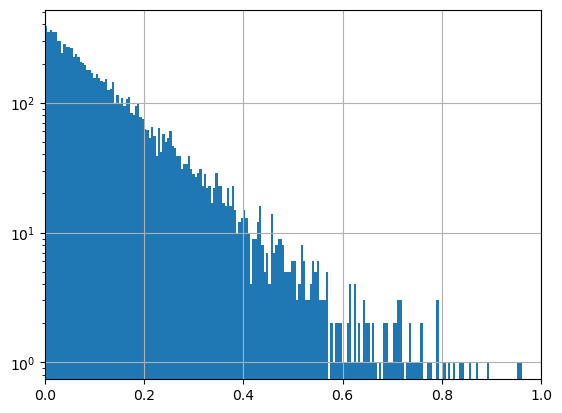

In [24]:
ax = df_muons['d_time'][1:].hist(bins=300)
ax.set_xlim(0,1.0)
ax.set_yscale("log")

<Axes: >

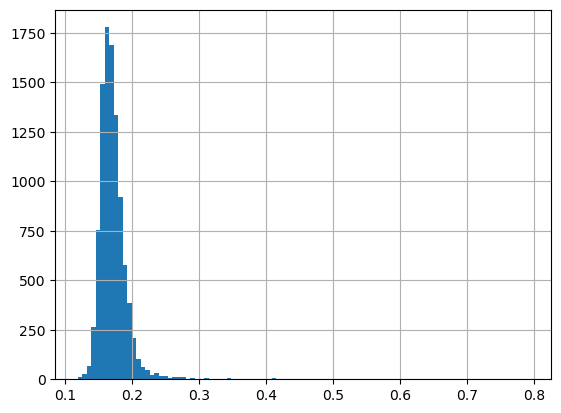

In [25]:
df_muons[df_muons['muon_efficiency']<1.0]['muon_efficiency'].hist(bins=100)

In [26]:
len(df_muons)/(df_muons['event_time'].values[-1] - df_muons['event_time'].values[0])

8.403235927850593

In [27]:
len(df_muons)

9904

In [28]:
df_muons.keys()

Index(['event_id', 'event_time', 'mc_energy', 'ring_size', 'size_outside',
       'ring_center_x', 'ring_center_y', 'ring_radius', 'ring_width',
       'good_ring', 'muon_efficiency', 'ring_containment', 'ring_completeness',
       'impact_parameter', 'impact_x_array', 'impact_y_array', 'radial_stdev',
       'radial_skewness', 'radial_excess_kurtosis', 'num_pixels_in_ring',
       'mean_pixel_charge_around_ring', 'hg_peak_sample', 'lg_peak_sample',
       'd_time'],
      dtype='object')

In [29]:
df_muons

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample,d_time
0,597,1.605670e+09,-1,1389.784058,0.000000,0.640610,-2.058698,1.102953,0.103546,True,...,-5.160393,-6.982202e+00,0.083015,-1.033386,0.801208,199,0.274554,22,0,NaN
1,1925,1.605670e+09,-1,1976.880249,0.000000,0.428783,-0.026210,1.013288,0.085649,True,...,0.591221,-5.849169e+00,0.070420,0.335218,0.007774,357,0.139532,19,0,0.243762
2,3206,1.605670e+09,-1,1213.570312,0.000000,-1.545685,-0.987876,0.970560,0.120026,True,...,0.376944,-2.491965e+00,0.068037,0.199201,-0.572897,187,0.388098,13,0,0.228709
3,7726,1.605670e+09,-1,1142.790161,14.797824,1.004540,-1.326750,0.842497,0.100591,True,...,4.757275,6.095473e-01,0.087156,-0.279170,0.317981,181,0.574799,27,0,0.814215
4,7910,1.605670e+09,-1,1914.081299,0.000000,-1.213557,-0.036744,1.155867,0.061289,True,...,4.130029,8.847540e+00,0.049802,-0.025007,-0.466322,401,-0.114832,15,0,0.033845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,5782989,1.605671e+09,-1,1492.532227,0.000000,-1.003647,-1.336290,1.183393,0.027938,True,...,-3.392759,-1.286807e-09,0.036199,-0.130961,0.134521,296,0.167588,14,0,0.012486
13,5783073,1.605671e+09,-1,1491.636353,0.000000,0.945882,-2.144770,1.146664,0.103392,True,...,-5.401498,-8.550613e-01,0.082823,-0.970282,0.947409,198,0.363961,20,0,0.017873
14,5783305,1.605671e+09,-1,1681.668945,0.000000,-1.598725,0.691328,1.222656,0.063109,True,...,8.627695,-2.998675e+00,0.056098,-0.547895,0.234131,277,0.018747,20,0,0.053002
15,5783403,1.605671e+09,-1,1629.273926,0.000000,-0.318018,-0.997416,0.983160,0.124312,True,...,6.510617,5.186501e-01,0.092422,0.092315,0.026137,336,0.188017,22,0,0.023643


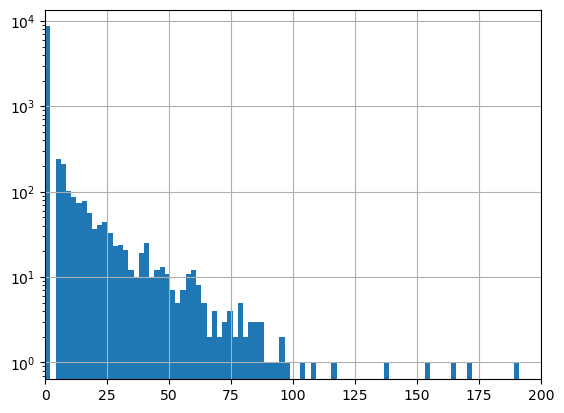

In [30]:
ax = df_muons['size_outside'].hist(bins=400)
ax.set_xlim(0,200)
ax.set_yscale("log")

(0.1, 0.3)

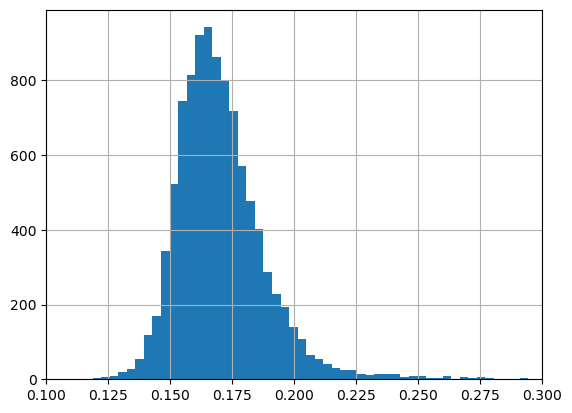

In [31]:
ax = df_muons['muon_efficiency'].hist(bins=10000)
ax.set_xlim(0.1,0.3)
#ax.set_yscale("log")

(0.0, 0.2)

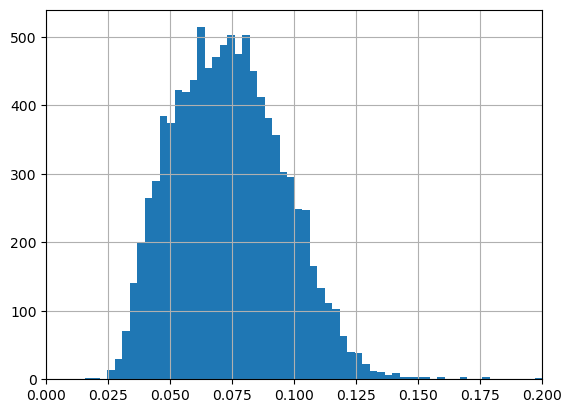

In [32]:
ax = df_muons['ring_width'].hist(bins=10000)
ax.set_xlim(0.0,0.2)
#ax.set_yscale("log")

(-1.0, 2.0)

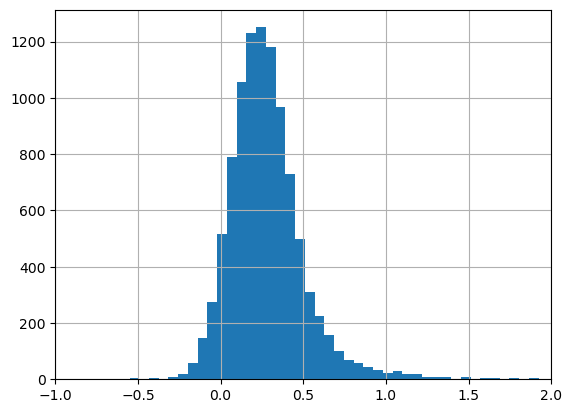

In [33]:
ax = df_muons['mean_pixel_charge_around_ring'].hist(bins=100)
ax.set_xlim(-1.0,2)
#ax.set_yscale("log")

In [34]:
#ax = df_muons[''].hist(bins=100)
#ax.set_xlim(-1.0,2)
#ax.set_yscale("log")

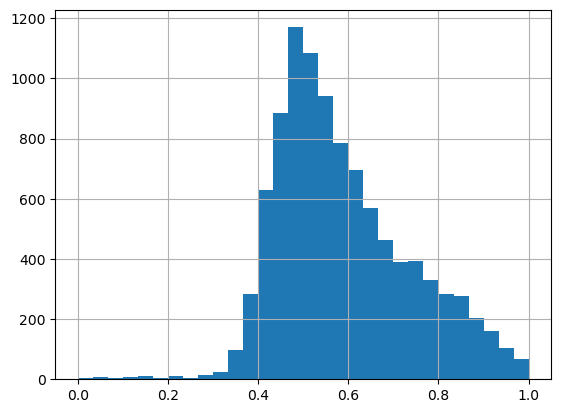

In [35]:
ax=df_muons['ring_completeness'].hist(bins=30)
#ax.set_xlim(1,10)
#ax.set_yscale("log")

(0.75, 1.3)

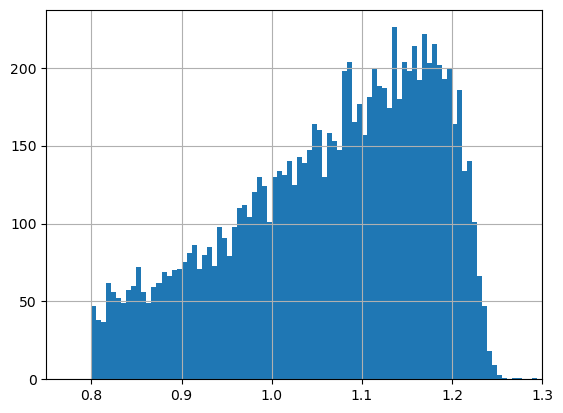

In [36]:
ax=df_muons['ring_radius'].hist(bins=100)
ax.set_xlim(0.75,1.3)
#ax.set_yscale("log")

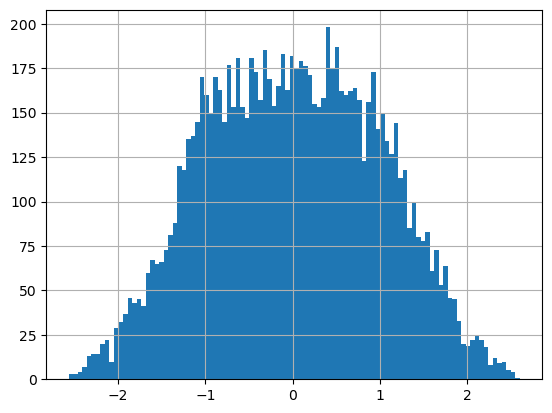

In [37]:
ax = df_muons['ring_center_x'].hist(bins=100)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

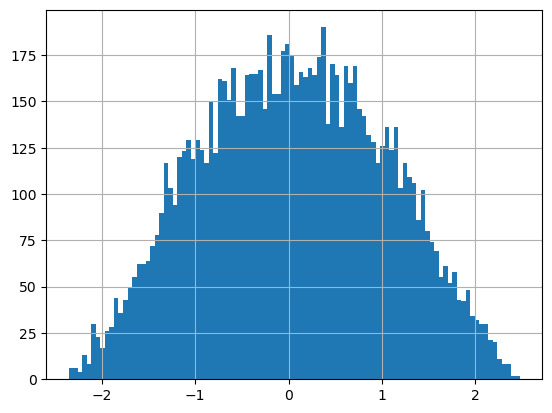

In [38]:
ax = df_muons['ring_center_y'].hist(bins=100)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

In [39]:
#ax = df_muons['x'].hist(bins=100)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

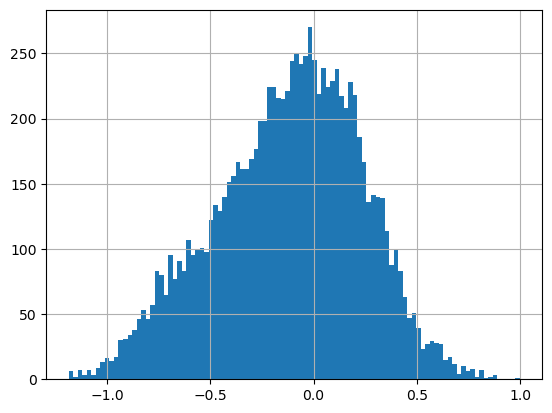

In [40]:
ax = df_muons['radial_skewness'].hist(bins=100)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

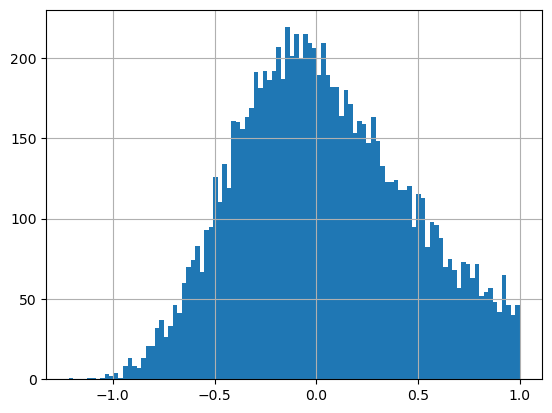

In [41]:
ax = df_muons['radial_excess_kurtosis'].hist(bins=100)

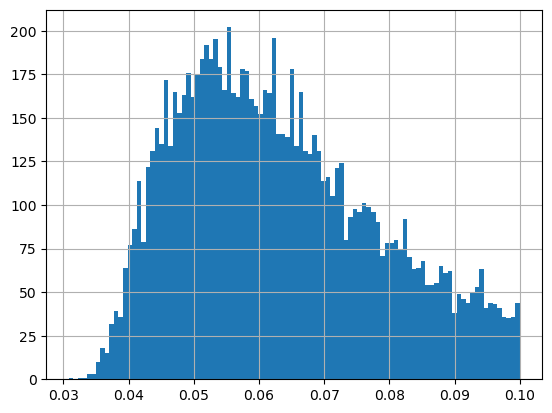

In [42]:
ax = df_muons['radial_stdev'].hist(bins=100)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

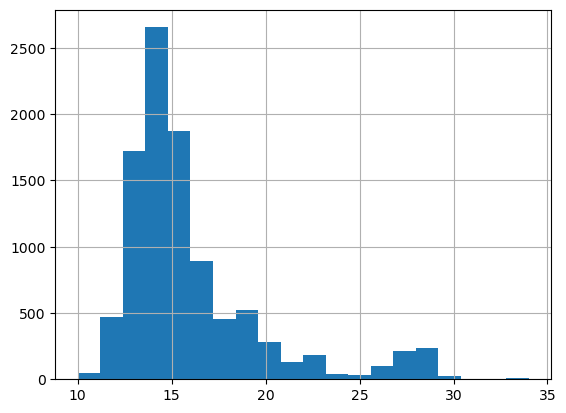

In [43]:
ax = df_muons['hg_peak_sample'].hist(bins=20)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

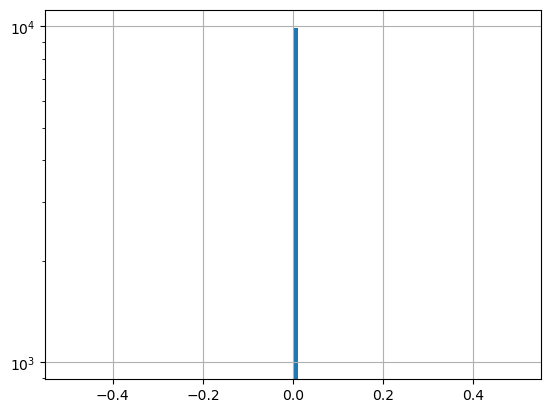

In [44]:
ax = df_muons['lg_peak_sample'].hist(bins=100)
#ax.set_xlim(0,0.1)
ax.set_yscale("log")

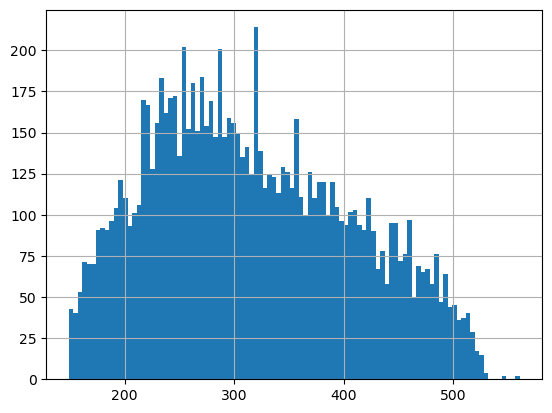

In [45]:
ax = df_muons['num_pixels_in_ring'].hist(bins=100)
#ax.set_xlim(0,0.1)
#ax.set_yscale("log")

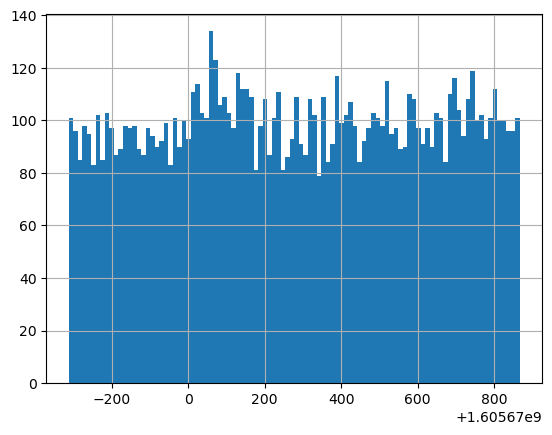

In [46]:
ax = df_muons['event_time'].hist(bins=100)
#ax.set_xlim(0,0.1)
#ax.set_yscale("log")

In [47]:
len(df_muons)/(df_muons['event_time'].values[-1] - df_muons['event_time'].values[0])

8.403235927850593

In [48]:
len(df_muons)

9904

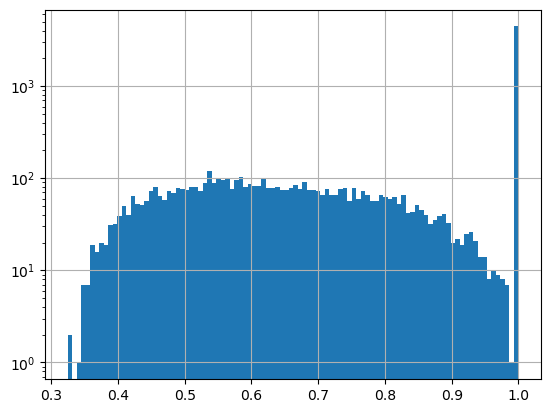

In [49]:
ax = df_muons['ring_containment'].hist(bins=100)
ax.set_yscale("log")

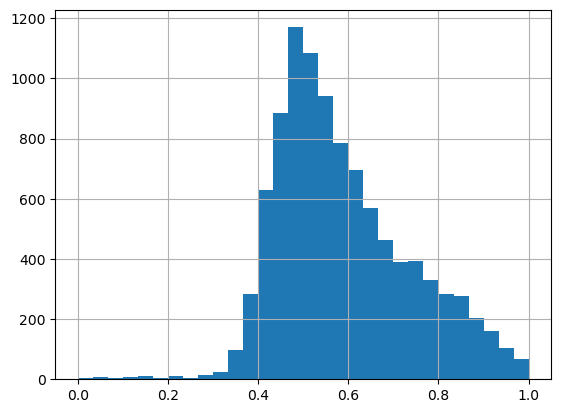

In [50]:
ax = df_muons['ring_completeness'].hist(bins=30)
#ax.set_yscale("log")

<Axes: >

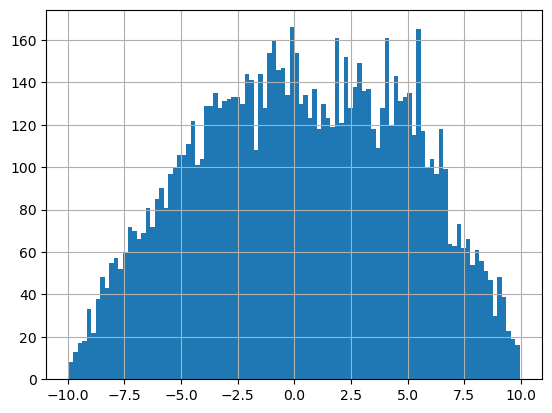

In [51]:
df_muons['impact_x_array'].hist(bins=100)

<Axes: >

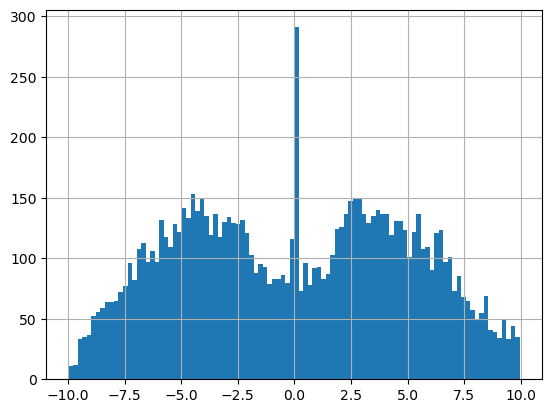

In [52]:
df_muons['impact_y_array'].hist(bins=100)

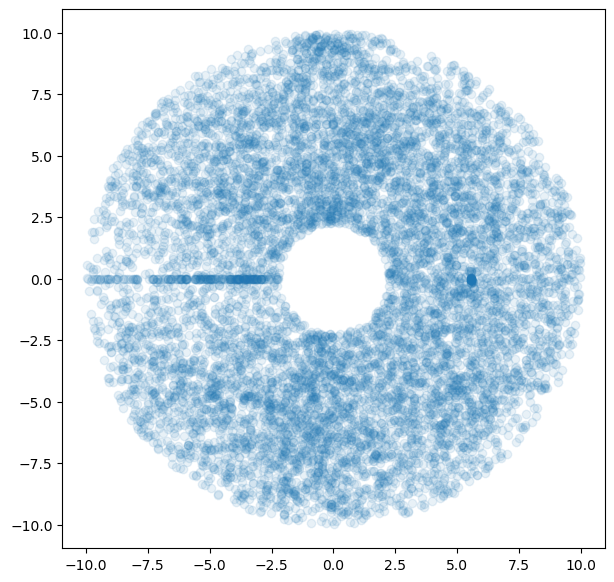

In [53]:
plt.figure(figsize=(7,7))
plt.scatter(df_muons['impact_x_array'].values,df_muons['impact_y_array'].values,alpha=0.1)

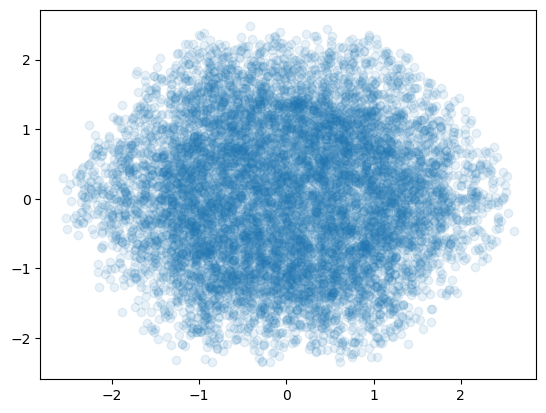

In [54]:
plt.scatter(df_muons['ring_center_x'].values,df_muons['ring_center_y'].values,alpha=0.1)

In [55]:
df_muons['ring_center_r2']=df_muons['ring_center_x']*df_muons['ring_center_x']+df_muons['ring_center_y']*df_muons['ring_center_y']

In [56]:
df_muons['ring_center_r']=np.sqrt(df_muons['ring_center_r2'])

<Axes: >

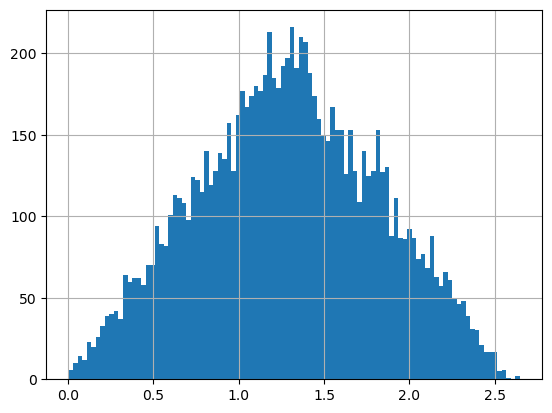

In [57]:
df_muons['ring_center_r'].hist(bins=100)

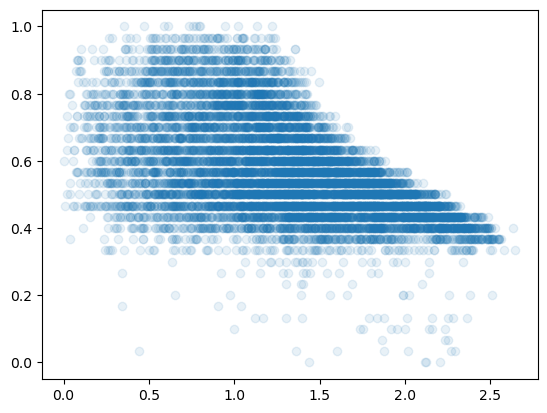

In [58]:
plt.scatter(df_muons['ring_center_r'].values,df_muons['ring_completeness'].values,alpha=0.1)

In [59]:
df_muons['impact_r2_array']=df_muons['impact_x_array']*df_muons['impact_x_array']+df_muons['impact_y_array']*df_muons['impact_y_array']

In [60]:
df_muons['impact_r_array']=np.sqrt(df_muons['impact_r2_array'])

<Axes: >

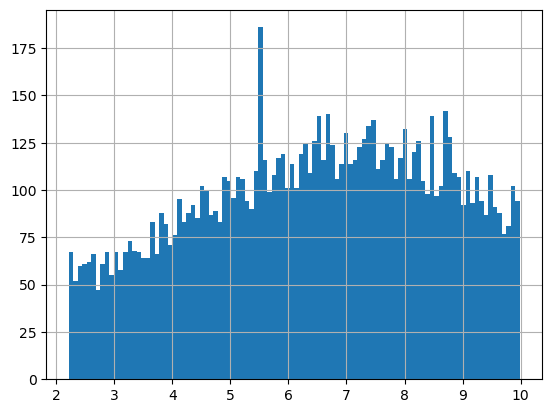

In [61]:
df_muons['impact_r_array'].hist(bins=100)

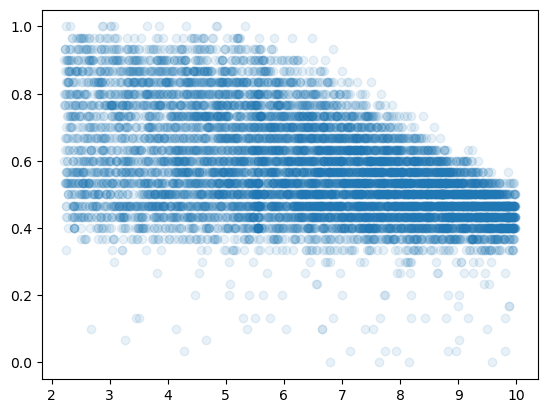

In [62]:
plt.scatter(df_muons['impact_r_array'].values,df_muons['ring_completeness'].values,alpha=0.1)

In [63]:
df_short=df_muons[['impact_r_array','ring_center_r','ring_completeness']]

In [64]:
len(df_short)

9904

In [65]:
df_short.to_csv('test_v0.10.csv',sep=' ')